In [1]:
# M1 -> Cleaning, tidying and visualizations
# M2 -> Feature Engineering and pipeline
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor

## Reading the data

In [368]:
root_path_happiness = 'Data/Happiness_Dataset'
world_happiness_2015_df = pd.read_csv(root_path_happiness + '/2015.csv')
world_happiness_2016_df = pd.read_csv(root_path_happiness + '/2016.csv')
world_happiness_2017_df = pd.read_csv(root_path_happiness + '/2017.csv')
world_happiness_2018_df = pd.read_csv(root_path_happiness + '/2018.csv')
world_happiness_2019_df = pd.read_csv(root_path_happiness + '/2019.csv')

In [369]:
print(world_happiness_2015_df.columns.tolist(), "2015")
print()
print(world_happiness_2016_df.columns.tolist(),"2016")
print()
print(world_happiness_2017_df.columns.tolist(),"2017") 
print()
print(world_happiness_2018_df.columns.tolist(),"2018")
print()
print(world_happiness_2019_df.columns.tolist(),"2019")

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 2015

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 2016

['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 2017

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] 2018

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support',

We notice the columns names needs to be changed, So we will change it according to this:

### 2015 : 
- 'Family' -> 'Social support'
- 'Health (Life Expectancy)' -> 'Healthy life expectancy'
- 'Freedom'->  'Freedom to make life choices'
### 2016 : 
- 'Family' -> 'Social support'
- 'Health (Life Expectancy)' -> 'Healthy life expectancy'
- 'Freedom'->  'Freedom to make life choices'
### 2017 : 
- 'Happiness.Rank' -> 'Happiness Score'
- 'Family' -> 'Social support'
- "Happiness.Score" -> 'Happiness Score'
- 'Economy..GDP.per.Capita.' -> 'Economy (GDP per Capita)'
- 'Health..Life.Expectancy.' -> 'Healthy life expectancy'
- 'Freedom'->  'Freedom to make life choices'
- 'Trust..Government.Corruption.' -> 'Trust (Government Corruption)'
- 'Dystopia.Residual'-> 'Dystopia Residual'
### 2018 : 
- 'Score' -> 'Happiness Score'
- 'GDP per capita' -> 'Economy (GDP per Capita)'
- 'Perceptions of corruption' -> 'Trust (Government Corruption)'
- 'Overall rank' -> 'Happiness Rank'
### 2019 : 
- 'Score' -> 'Happiness Score'
- 'GDP per capita' -> 'Economy (GDP per Capita)'
- 'Perceptions of corruption' -> 'Trust (Government Corruption)'
- 'Overall rank' -> 'Happiness Rank'


In [370]:
world_happiness_2015_df = world_happiness_2015_df.rename(columns={'Family': 'Social support','Health (Life Expectancy)':'Healthy life expectancy','Freedom':'Freedom to make life choices'})
world_happiness_2016_df = world_happiness_2016_df.rename(columns={'Family': 'Social support','Health (Life Expectancy)':'Healthy life expectancy','Freedom':'Freedom to make life choices'})
world_happiness_2017_df = world_happiness_2017_df.rename(columns={'Happiness.Rank' : 'Happiness Rank','Family':'Social support',"Happiness.Score" : 'Happiness Score','Health..Life.Expectancy.': 'Healthy life expectancy','Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Freedom':  'Freedom to make life choices', 'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'})
world_happiness_2018_df = world_happiness_2018_df.rename(columns={"Country or region": "Country","Score": "Happiness Score", 'GDP per capita' :'Economy (GDP per Capita)','Perceptions of corruption' : 'Trust (Government Corruption)', 'Overall rank' : 'Happiness Rank'})
world_happiness_2019_df = world_happiness_2019_df.rename(columns={"Country or region": "Country","Score": "Happiness Score", 'GDP per capita' :'Economy (GDP per Capita)','Perceptions of corruption' : 'Trust (Government Corruption)', 'Overall rank' : 'Happiness Rank'})

After renaming the columns, We explore the data by counting the number of null values in each column


In [371]:
print(world_happiness_2015_df.isnull().sum())
world_happiness_2015_df.head()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [372]:
print(world_happiness_2016_df.isnull().sum())
world_happiness_2016_df.head()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [373]:
print(world_happiness_2017_df.isnull().sum())
world_happiness_2017_df.head()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [374]:
print(world_happiness_2018_df.isnull().sum())
world_happiness_2018_df

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Generosity                       0
Trust (Government Corruption)    1
dtype: int64


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [375]:
print(world_happiness_2019_df.isnull().sum().values)
world_happiness_2019_df

[0 0 0 0 0 0 0 0 0]


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


There's no null values in the datasets, excpet one null value in 2018.

In [376]:
world_happiness_2018_df[world_happiness_2018_df['Trust (Government Corruption)'].isnull()]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


After exploring the records values, we found that it will be approprite to replace the null with 0, for the following reasons:
- If you added the attributes that contribute to the happiness score, you will get a number less than the actual score by 2, which is the case already with this record
- The records are sorted, replacing the null with zero will preserve this

In [377]:
# Repllace the null with zero
world_happiness_2018_df['Trust (Government Corruption)'].replace(np.nan,0 , inplace=True)

## Clustering
We will create clusters for the data for convenince
The clusters will depend on the happiness score

We used K-means method for clustring and The Elbow Method to determine the best number for k

## Helper Methods

In [378]:
# get the number of k approprite for kmean clusters
def find_k(data):
    columns=data.columns.values
    i=np.where(columns == "Happiness Score")[0][0]
    X = data.iloc[:, i:].values
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    return plt.show()

In [379]:
# k-means clustering
def create_clusters(data,k):
    # define dataset
    columns=data.columns.values
    i=np.where(columns == "Happiness Score")[0][0]
    X = data.iloc[:, i:].values
    # define the model
    model = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    y_kmeans = model.predict(X)
    clusters = pd.DataFrame(y_kmeans)
    clusters.columns = ["Cluster"] 
    newdata=pd.concat([data, clusters], axis=1)
    return newdata

In [380]:
def display_clusters(data):
    columns=data.columns.values
    i=np.where(columns == "Happiness Score")[0][0]
    values= data.iloc[:, i:].values
    # retrieve unique clusters
    y_kmeans=data.iloc[:,-1:]
    clusters = unique(y_kmeans)
    columns=data.iloc[:, i:-1].columns.values
    # create scatter plot for samples from each cluster
    for column in range(1,len(columns)):
        for cluster in clusters:
            # get row indexes for samples with this cluster
            row_ix = where(y_kmeans == cluster)
            # create scatter of these samples
            plt.scatter(values[row_ix, 0], values[row_ix, column])
        # show the plot
        plt.title(columns[column])
        plt.xlabel(columns[0])
        plt.ylabel(columns[column])
        plt.show()
        print()

## 2015

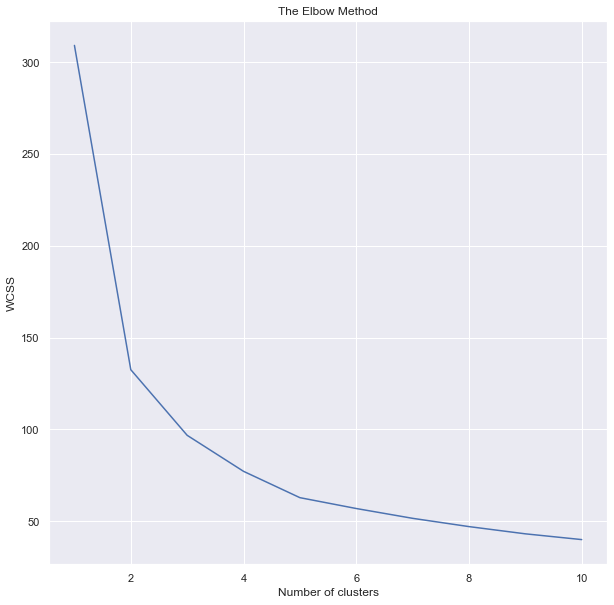

In [381]:
find_k(world_happiness_2015_df)

We notice the best number of k is 3.

In [382]:
clustered_2015=create_clusters(world_happiness_2015_df,3)
clustered_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0


and then displaying the data after clustring

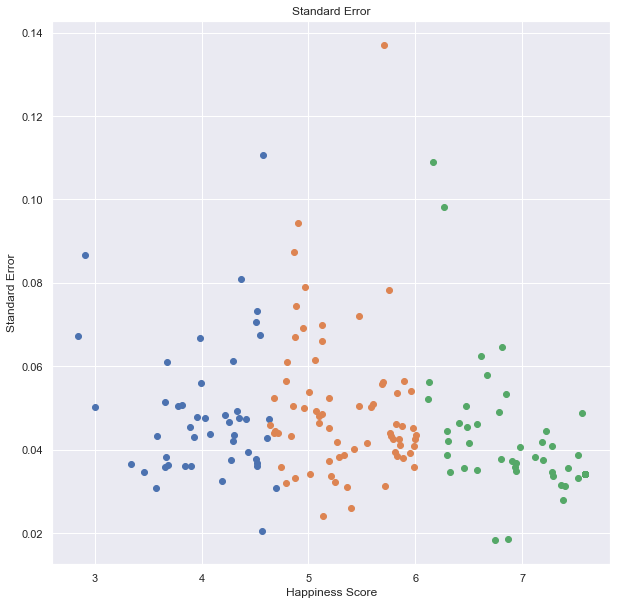

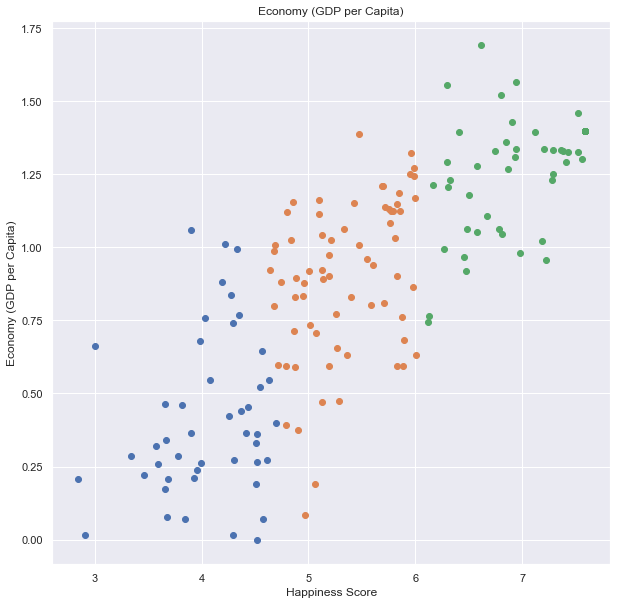

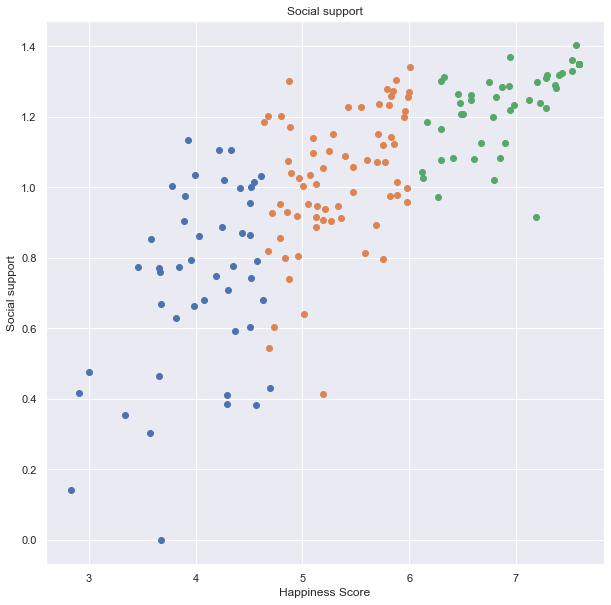

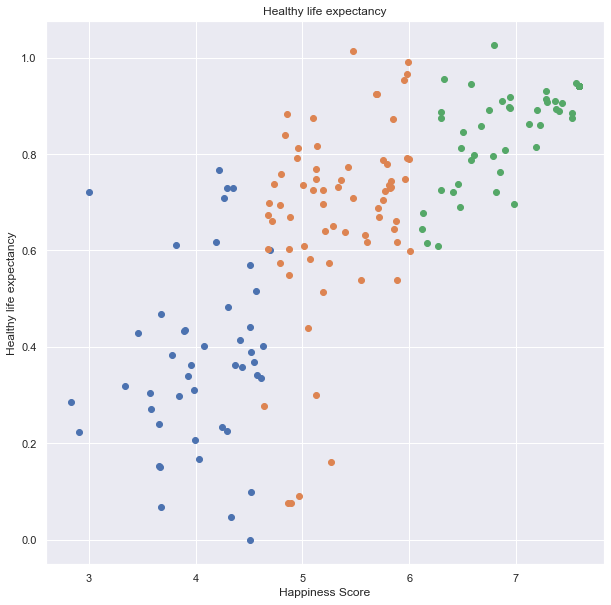

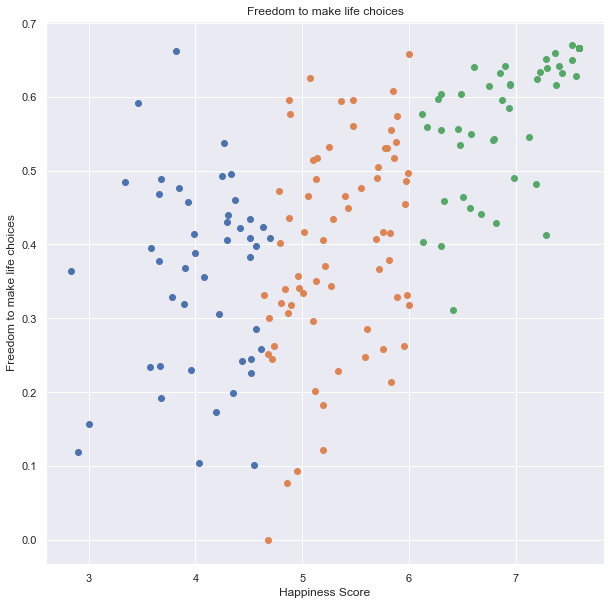

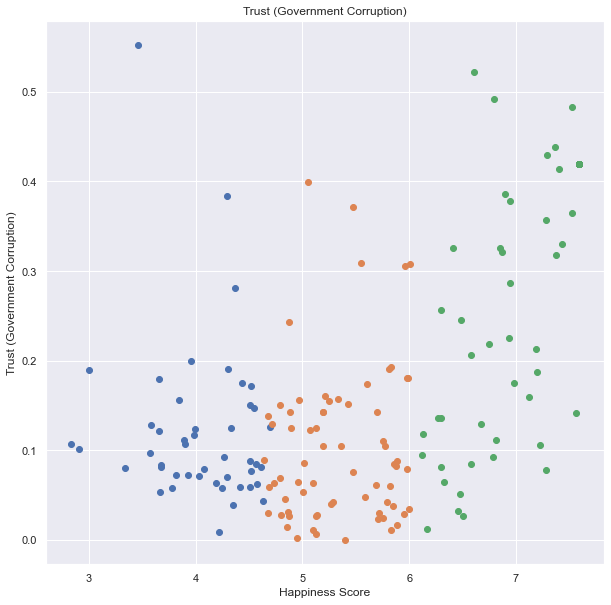

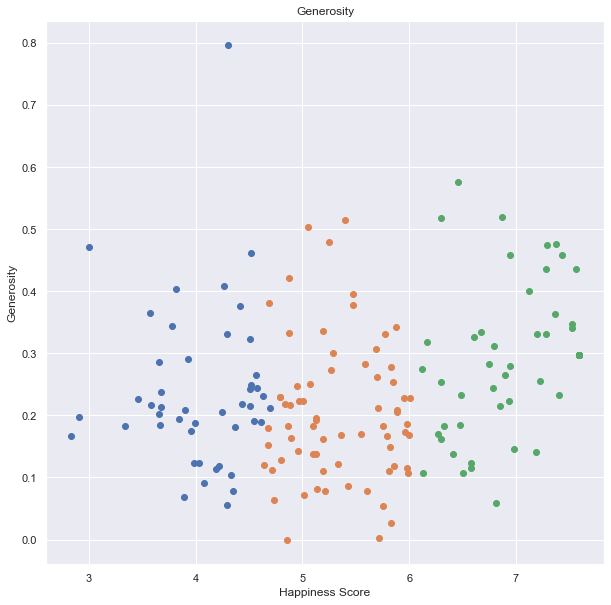

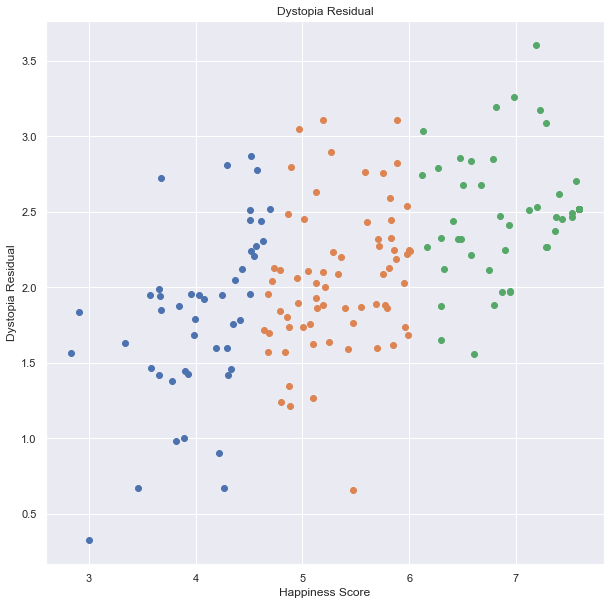

In [383]:
display_clusters(clustered_2015)

## 2016

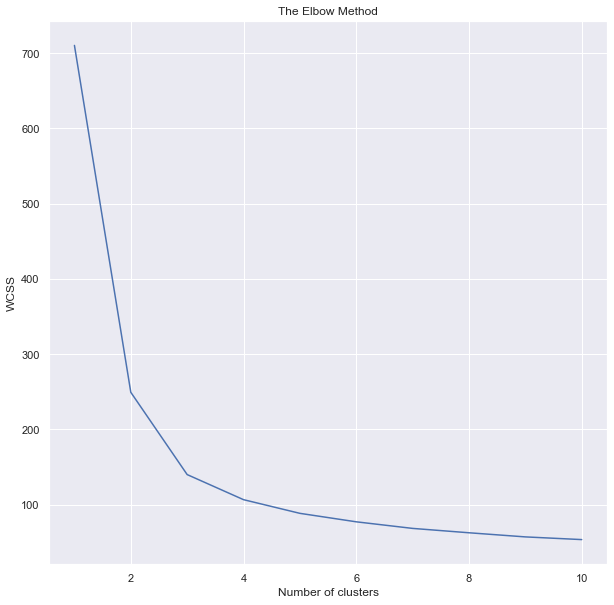

In [384]:
find_k(world_happiness_2016_df)

We notice the best number of k is 3.

In [385]:
clustered_2016=create_clusters(world_happiness_2016_df,3)
clustered_2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,0
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,0
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,0


and then displaying the data after clustring

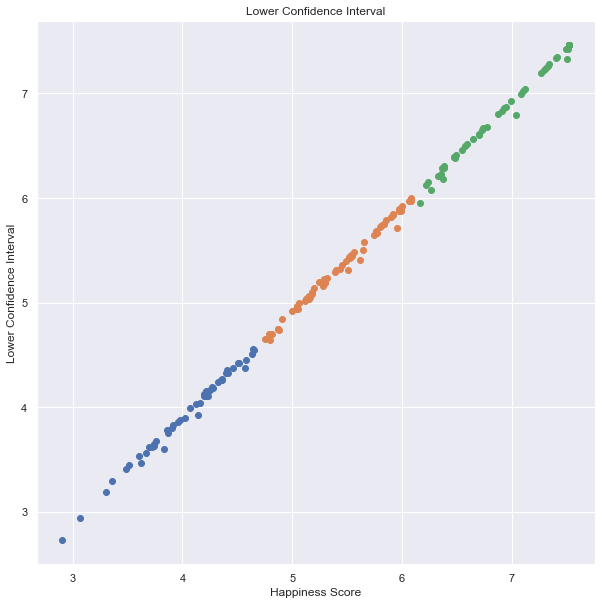

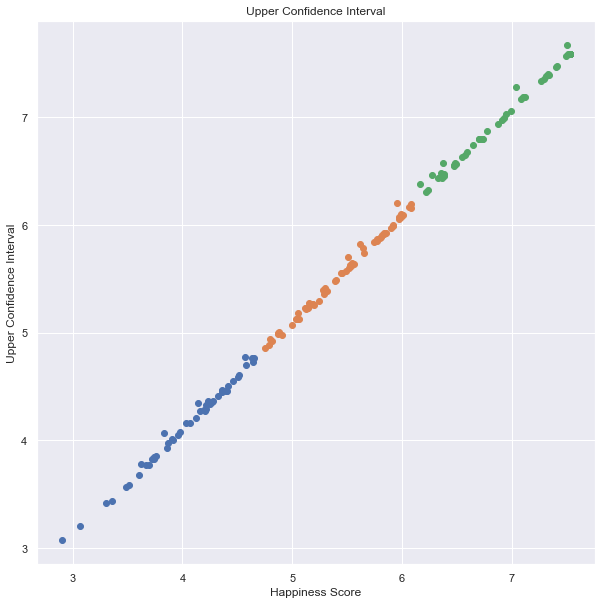

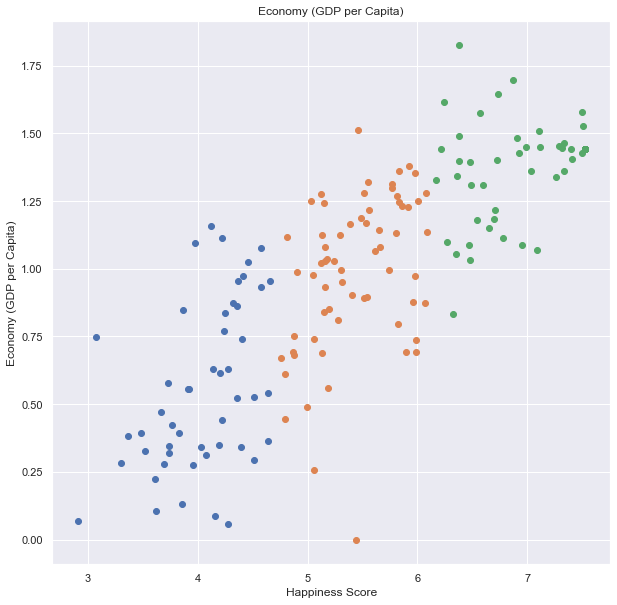

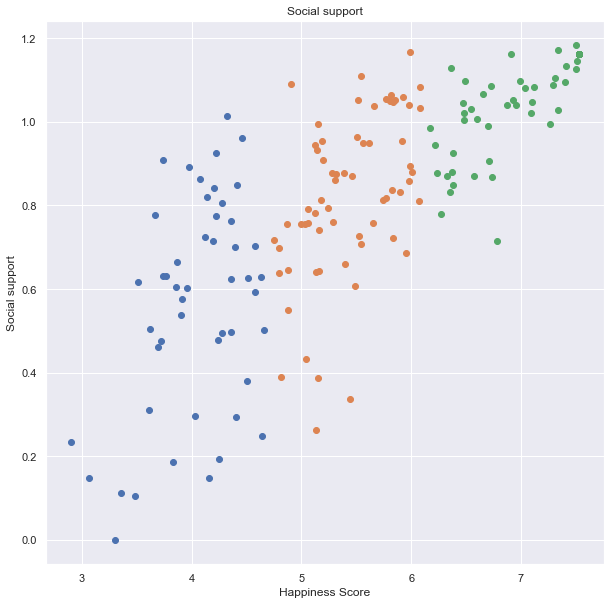

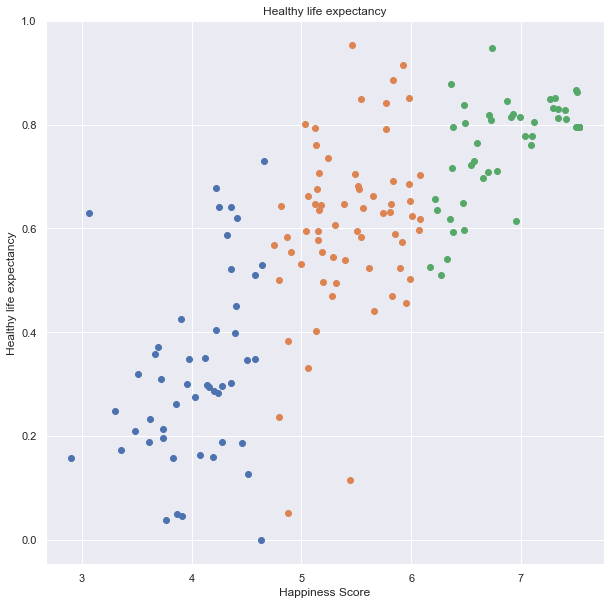

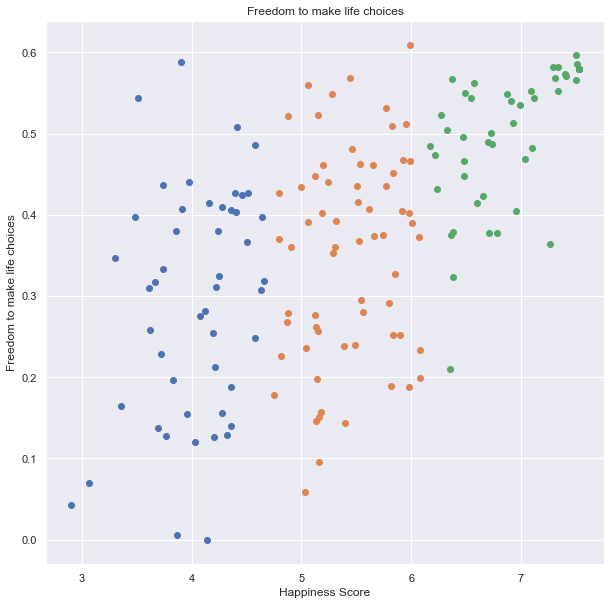

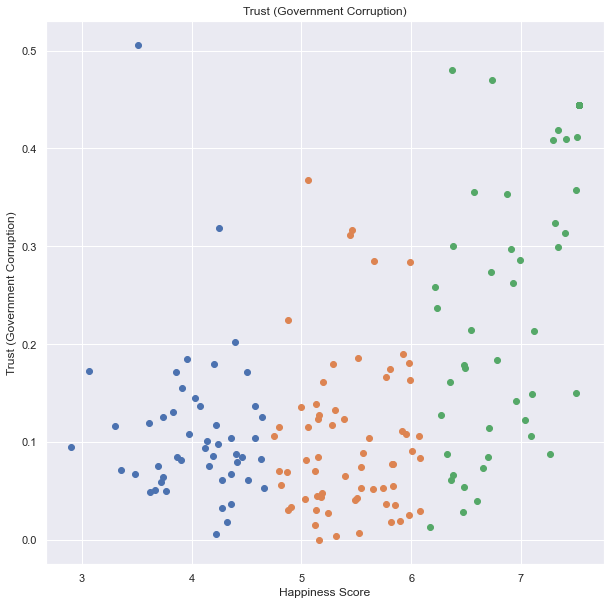

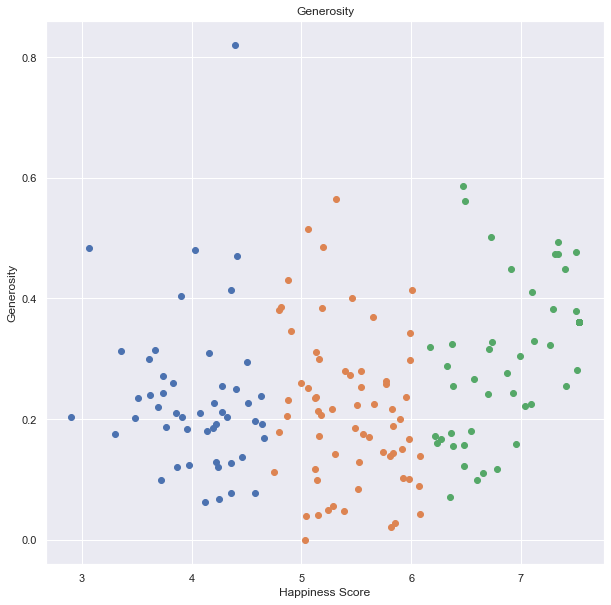

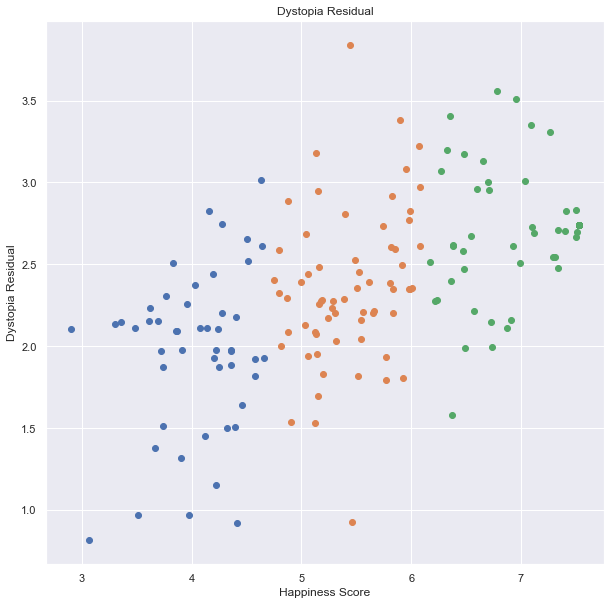

In [386]:
display_clusters(clustered_2016)

## 2017

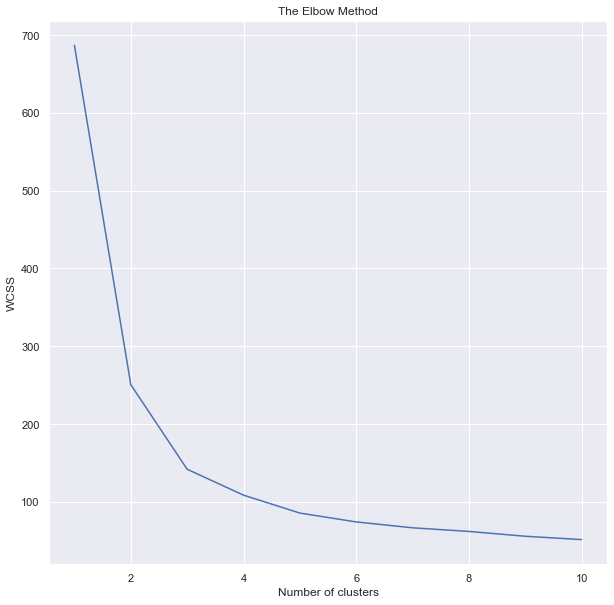

In [387]:
find_k(world_happiness_2017_df)

We notice the best number of k is 3.

In [388]:
clustered_2017=create_clusters(world_happiness_2017_df,3)
clustered_2017

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,1
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,1
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,1
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,1


and then displaying the data after clustring

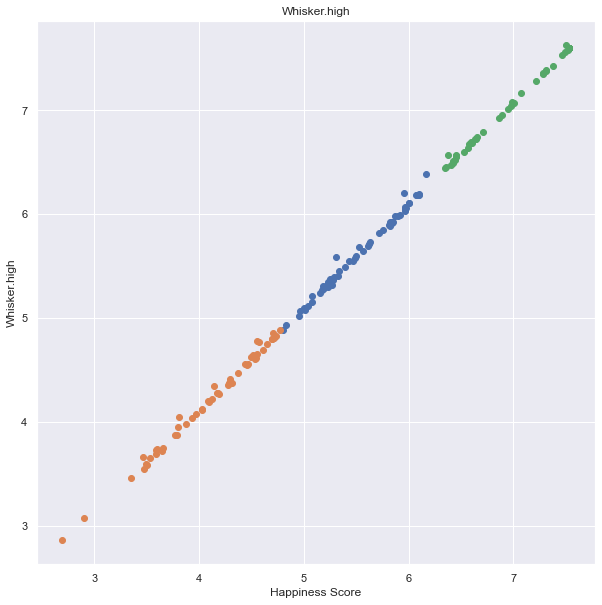

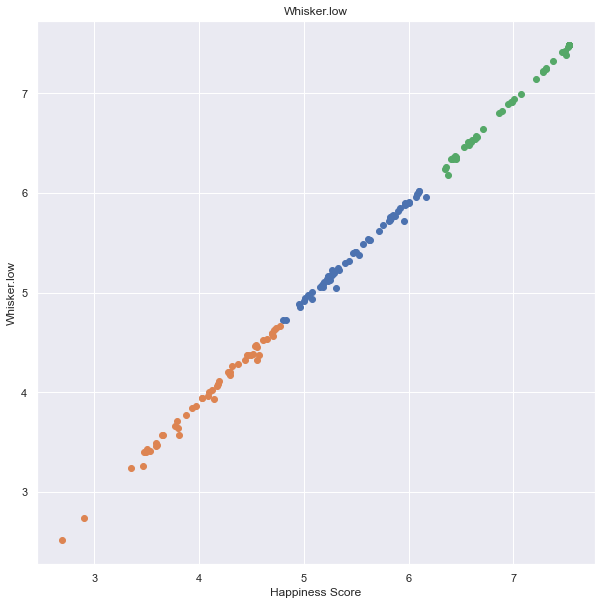

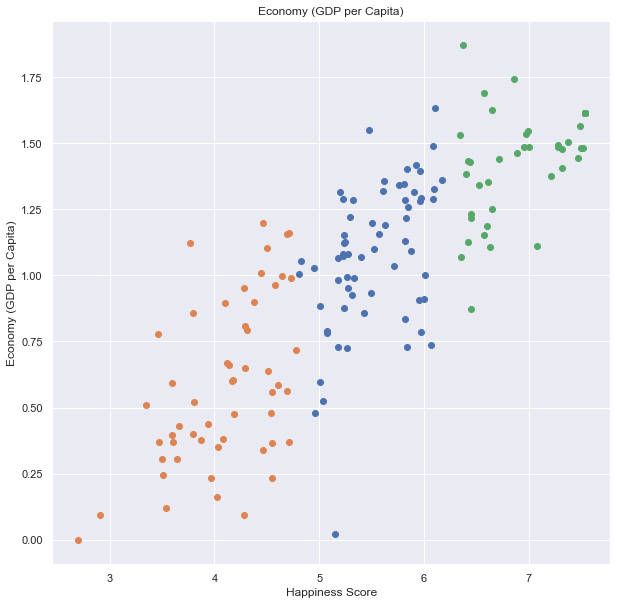

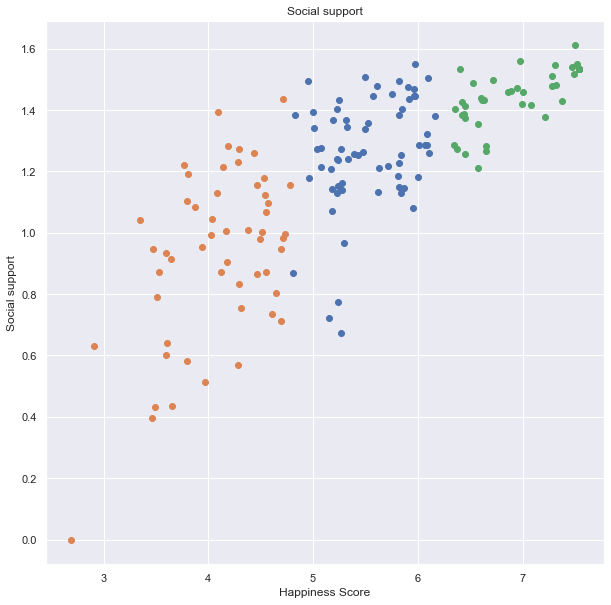

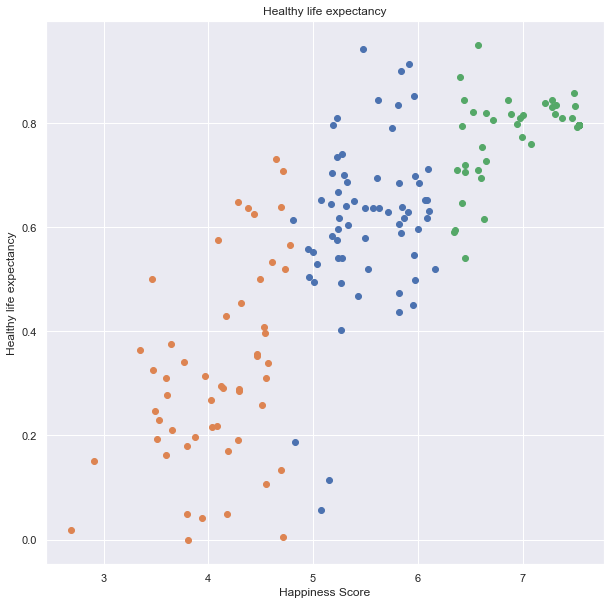

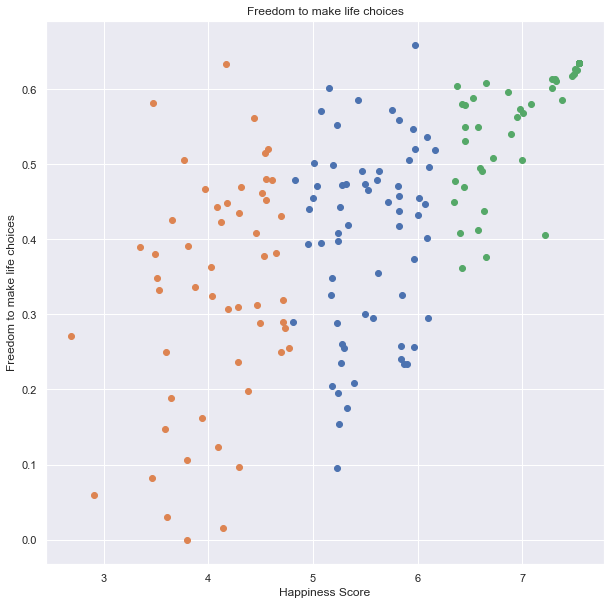

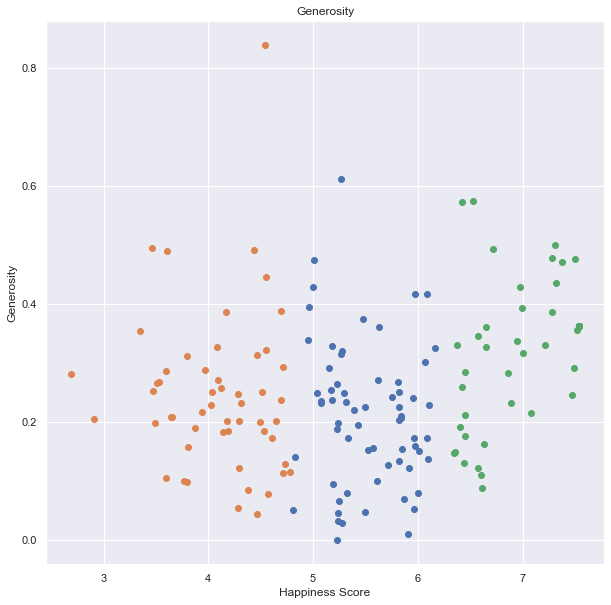

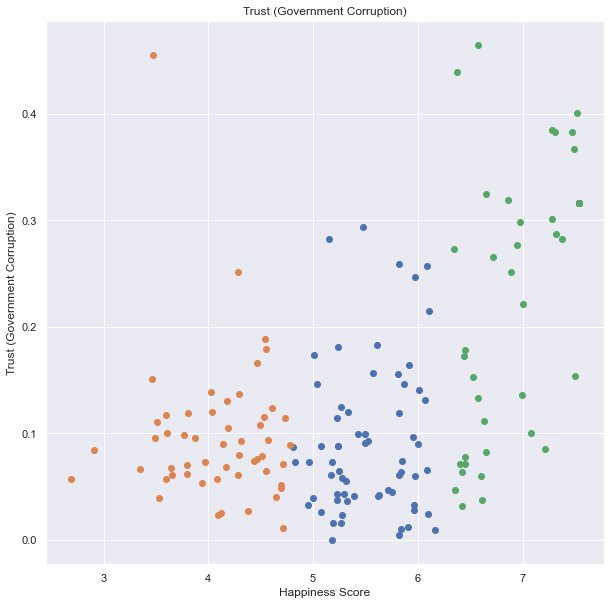

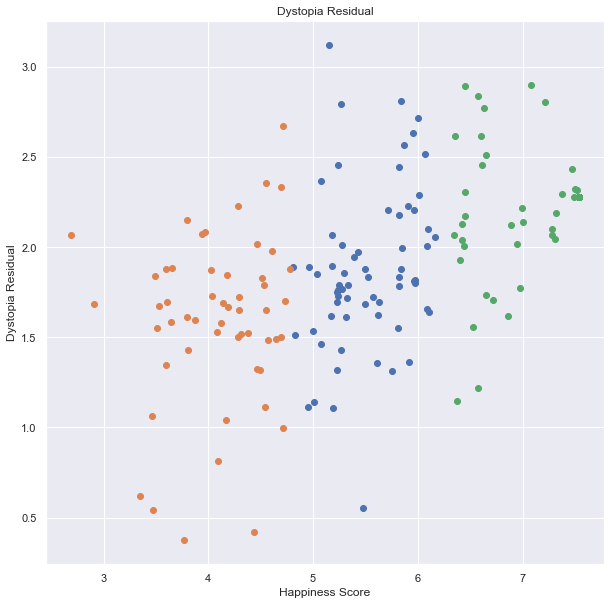

In [389]:
display_clusters(clustered_2017)

## 2018

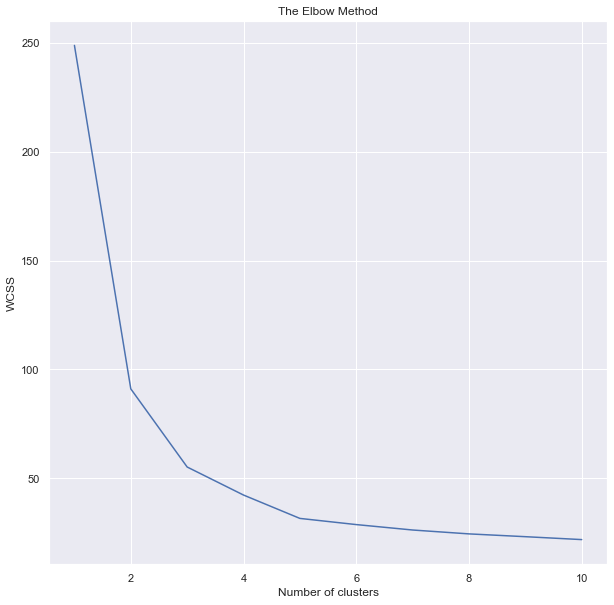

In [390]:
find_k(world_happiness_2018_df)

We notice the best number of k is 3.

In [391]:
clustered_2018=create_clusters(world_happiness_2018_df,3)
clustered_2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,1
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,1
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,1
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,1


and then displaying the data after clustring

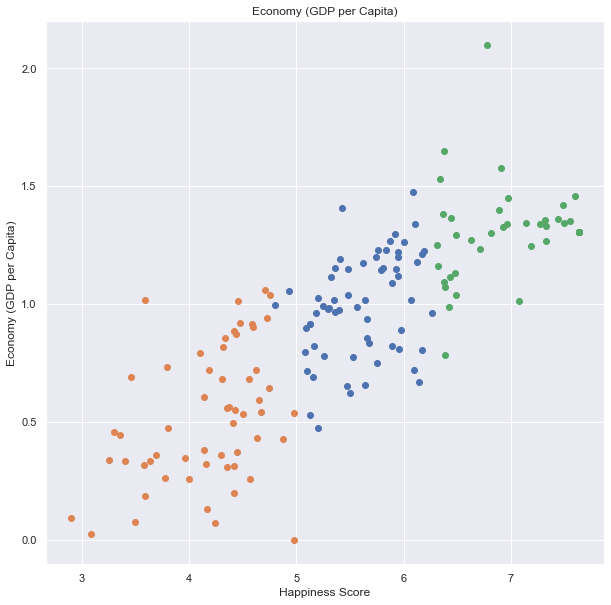

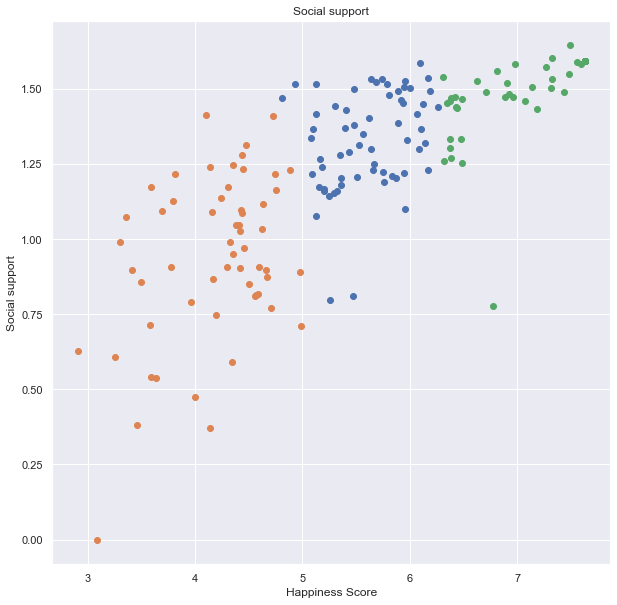

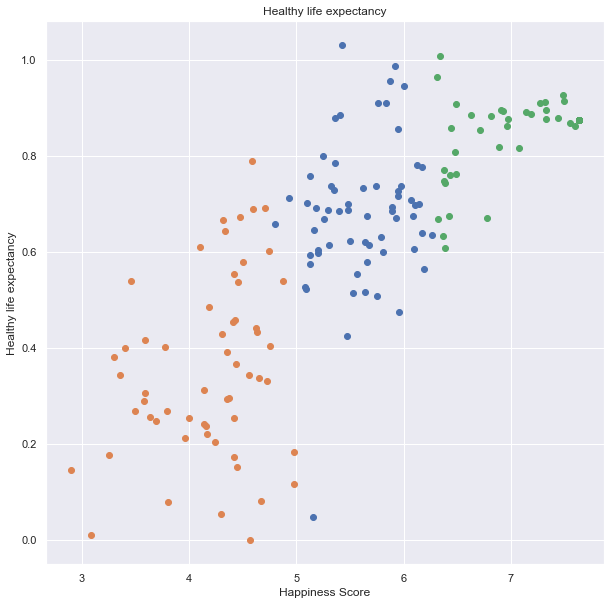

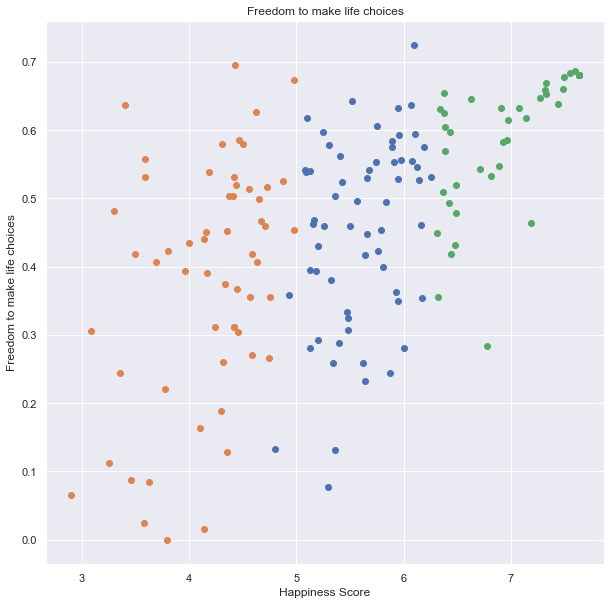

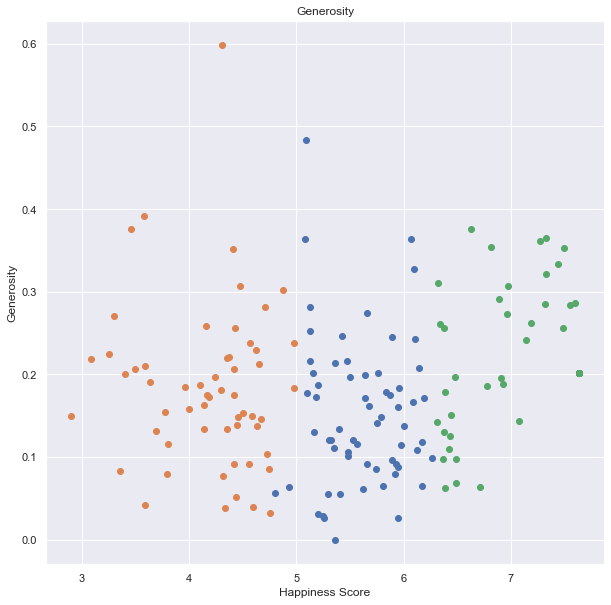

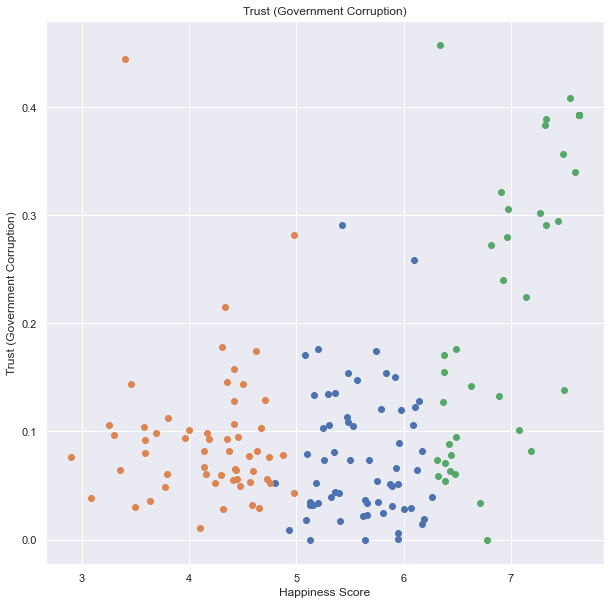

In [392]:
display_clusters(clustered_2018)

## 2019

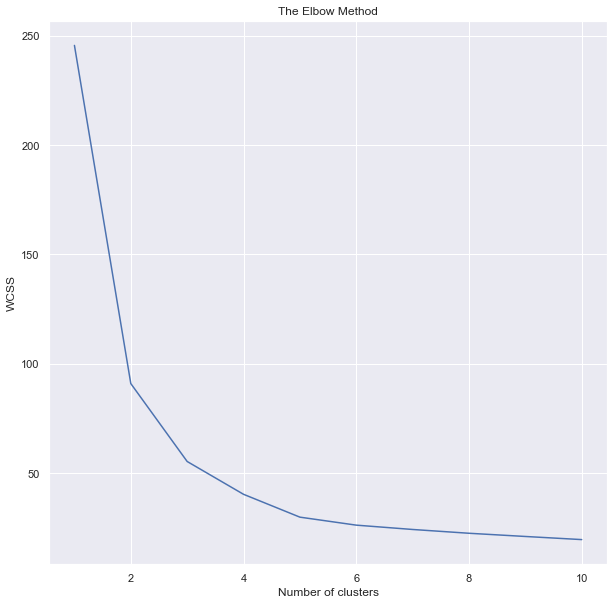

In [393]:
find_k(world_happiness_2019_df)

We notice the best number of k is 3.

In [394]:
clustered_2019=create_clusters(world_happiness_2019_df,3)
clustered_2019

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0


and then displaying the data after clustring

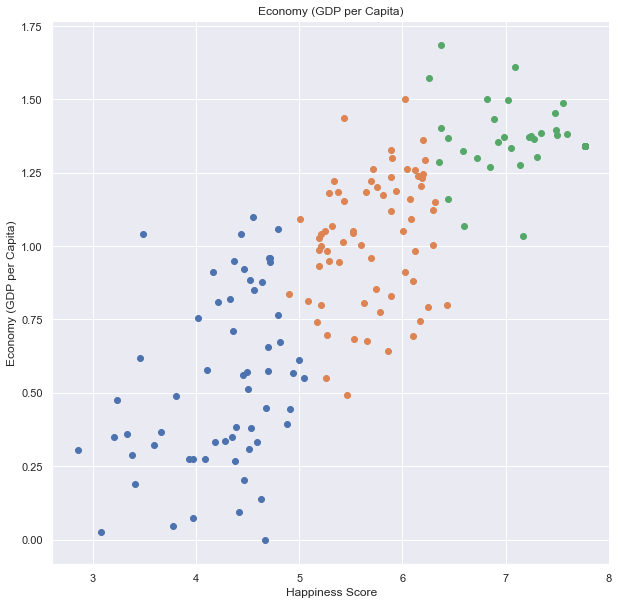

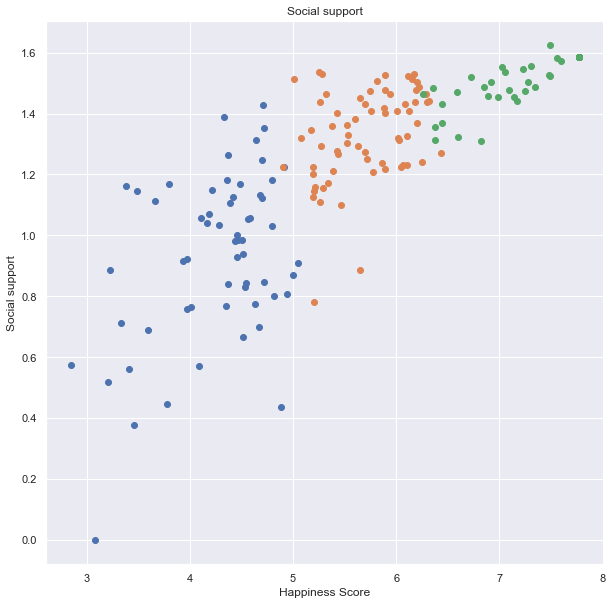

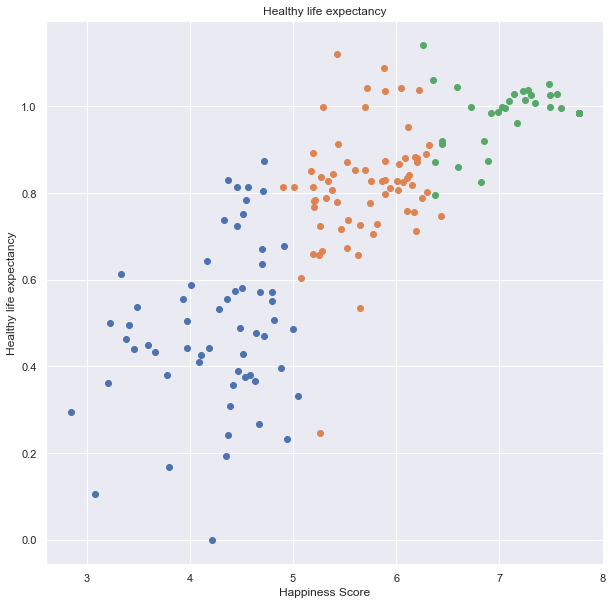

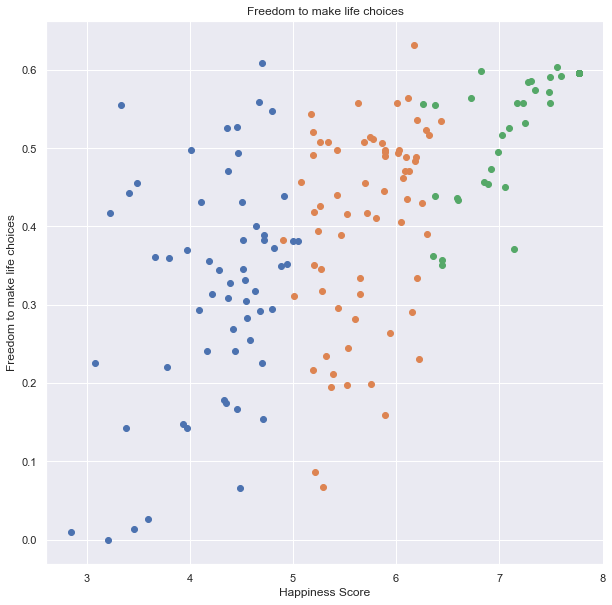

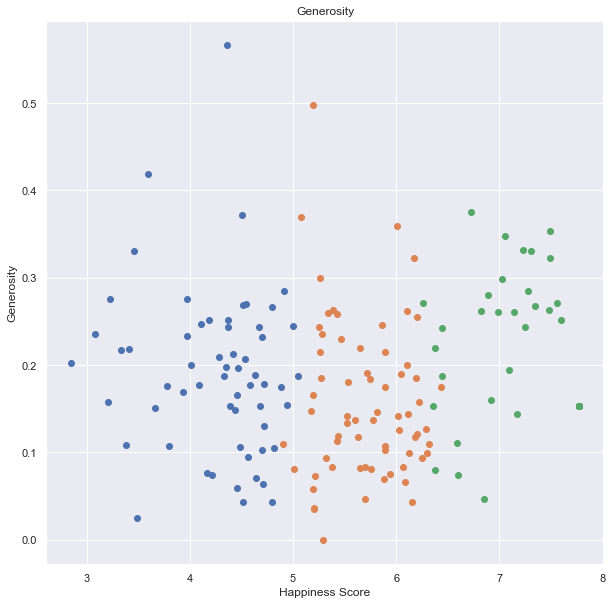

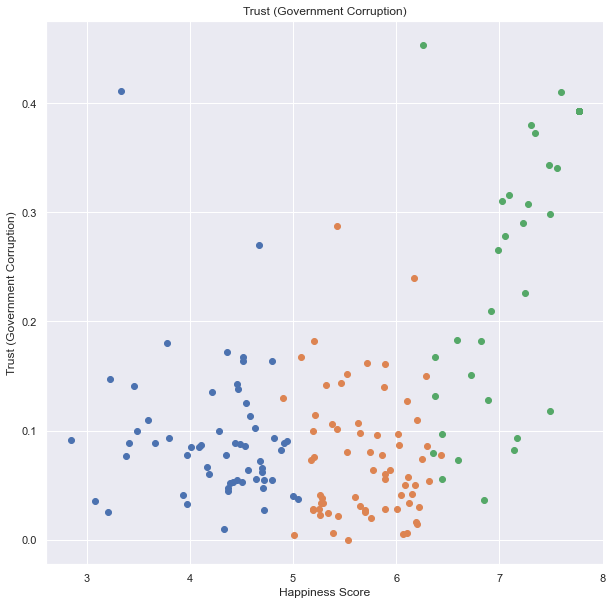

In [395]:
display_clusters(clustered_2019)

# Outlires

## Helper methods
outlires used and viewed in box plot and scatter plots 
and The handling of the outlires was done by Smoothing by bin boundary technique

In [396]:
def outliers_scatter(df,outliers):
    plt.scatter(df[:,0], df[:,1])
    plt.scatter(outliers[:,0],outliers[:,1], color='r')
    plt.show()
def boxplot(data,column):
    y_kmeans=data.iloc[:,-1:]
    clusters = unique(y_kmeans)
    all_outliers=pd.DataFrame(columns=data.columns)
    for cluster in clusters:
        df =  data[data['Cluster'] == cluster]
        sns.set(rc={'figure.figsize':(6,6)})
        sns.boxplot(x =df[column])
        plt.title(cluster)
        plt.show()
        Q1_df = df.quantile(0.25)
        Q3_df = df.quantile(0.75)
        IQR_df = Q3_df - Q1_df
        outliers = (df < (Q1_df - 1.5 * IQR_df)) | (df > (Q3_df + 1.5 * IQR_df))
        outliers =  df[outliers[column] == True]
        all_outliers=all_outliers.append(outliers) 
        columns =df.columns
        i=np.where(columns == column)[0][0]
        all_data=df.iloc[:,i-1:i+1].values
        outliers_df=outliers.iloc[:,i-1:i+1].values
        if(outliers.size>0):
#             print(outliers.loc[:,"Happiness Rank"].values)
#             print(outliers.loc[:,"Country"].values)
            plt.title(cluster)
            outliers_scatter(all_data,outliers_df)
    return(all_outliers)
#         else:
#             print("no outliers")
def bar_plot(data,column):
    y_kmeans=data.iloc[:,-1:]
    clusters = unique(y_kmeans)
    all_outliers=pd.DataFrame(columns=data.columns)
    for cluster in clusters:
        df =  data[data['Cluster'] == cluster]
        sns.set(rc={'figure.figsize':(10,10)})
        sns.barplot(y=df['Country'],x =df[column])
        plt.title(cluster)
        plt.show()

To detect and view the data

In [397]:
def handling(data,outliers,column):
    y_kmeans=data.iloc[:,-1:]
    clusters = unique(y_kmeans)
    all_outliers=pd.DataFrame(columns=data.columns)
    for cluster in clusters:
        df =  data[data['Cluster'] == cluster]
        all_values =  df.loc[:,column].values
        all_values.sort()
        outlier_value =  outliers[outliers['Cluster'] == cluster]
        outlier_value = outlier_value.loc[:,column].values
        for value in outlier_value :
            i=np.where(all_values == value)[0]
            print(i)
            if(len(i)>0):
                if(i[0]>=0) :
                    all_values=np.delete(all_values,i)
                    if len(all_values)<=i[0]:
                        i=len(all_values)-2
                    value_before=all_values[i-1]
                    while(value==value_before.any()):
                        i=i-1
                        value_before=all_values[i]

                    print(value_before)
                    if(isinstance(i,np.ndarray)):
                        for i in range(len(i)):
                            data[column].replace([value], value_before[i], inplace=True)    
                    else:
                        data[column].replace([value], value_before, inplace=True) 
                else:
                    print("Already handled")
        else:
            print("Done")

The handling of the outlires with Smoothing by bin boundary technique

## 2015

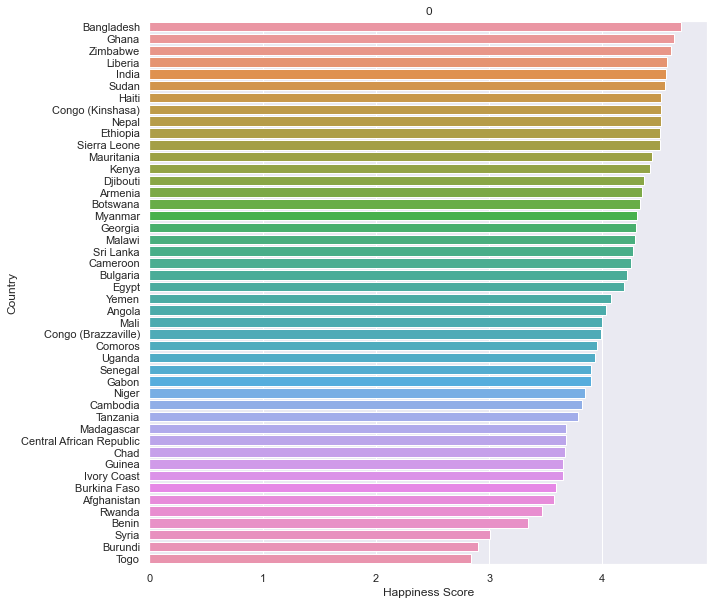

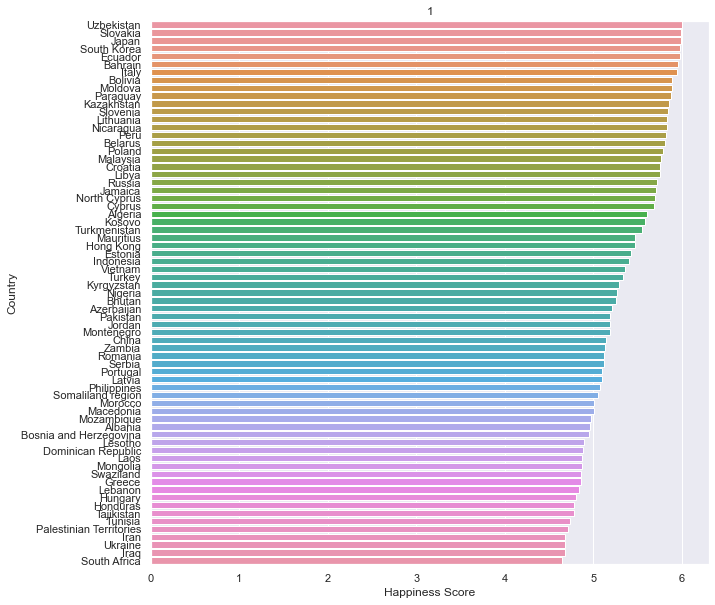

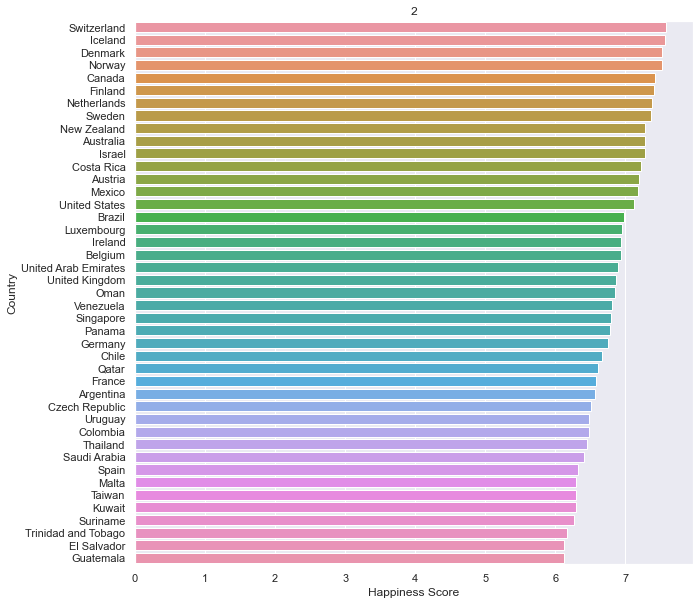

In [398]:
outliers=bar_plot(clustered_2015,"Happiness Score")

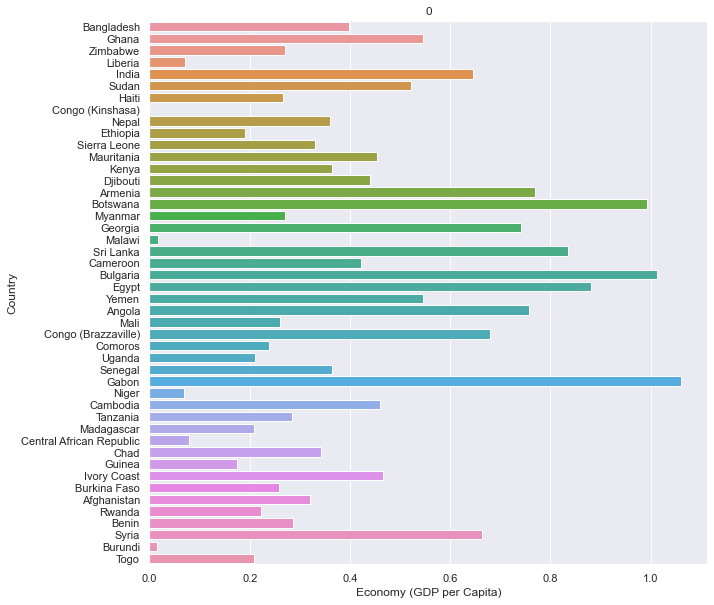

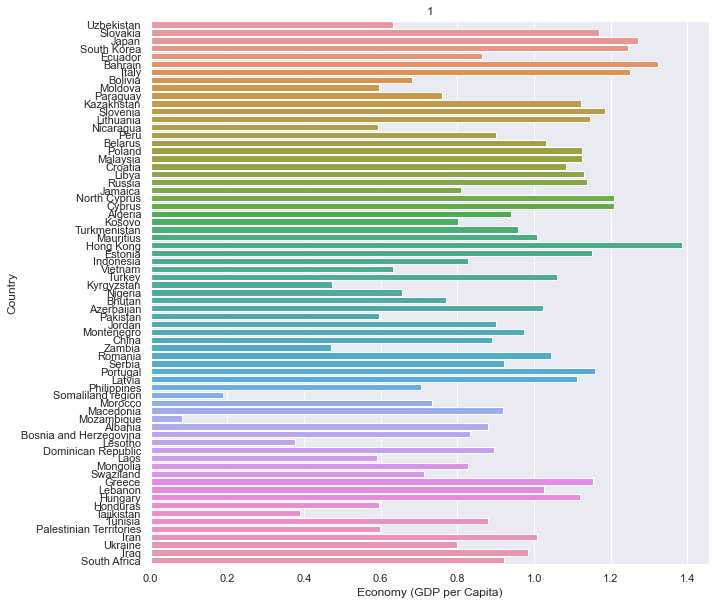

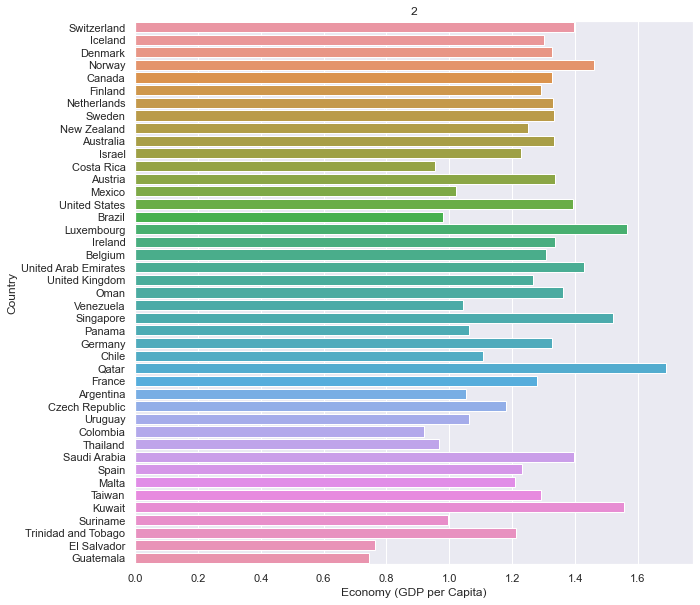

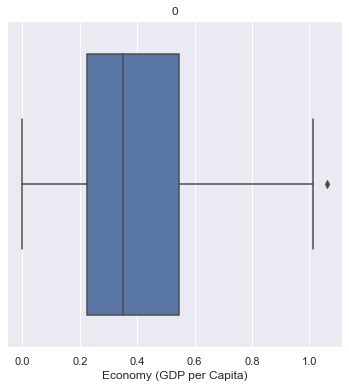

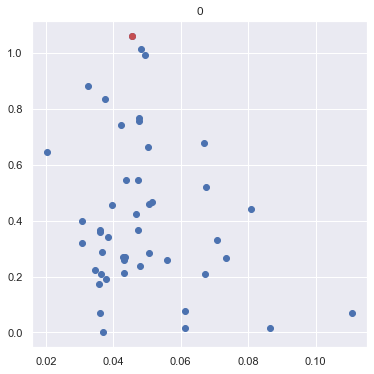

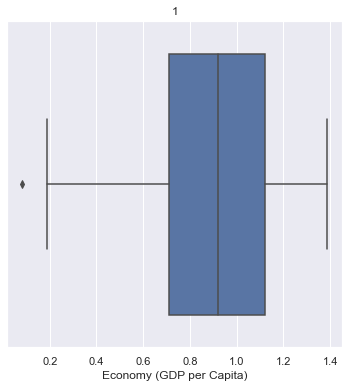

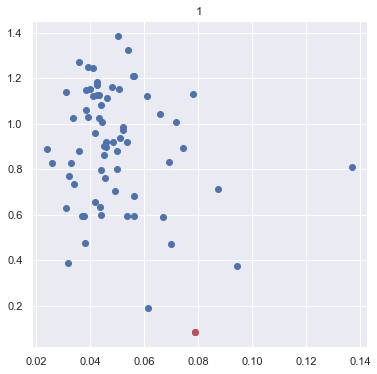

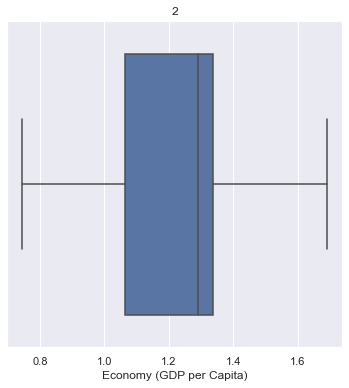

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
142,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895,0
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137,1


In [399]:
bar_plot(clustered_2015,"Economy (GDP per Capita)")
outliers=boxplot(clustered_2015,"Economy (GDP per Capita)")
outliers

It is apparent that these 2 countries are outliers. They are on both ends of the spectrum, one of them considers GDP a very important contributing factor to happiness, and the other the exact opposite. We can handle this outlier easily using the handle function, however, it does not make sense to smooth this point and reduce its effect due to the fact that different countries have different cultures and different perspectives towards what matters. A possible  explaination for Gabon valuing GDP a lot more than usual would be because the nation is suffering from poverty and consider financial saftey a very important contributing aspect towards happiness. On the other hand, Mozambique does not value GDP despite having similar charachteristics to Gabon. A possible explaination would be that the nations culture is not material oriented. This is an example of how outliers can serve as real values that are of interest and worth analysing.

In [400]:
#handling(clustered_2015,outliers,"Economy (GDP per Capita)")

[45]
0.8818
Done
[0]
[1.38604]
Done
Done


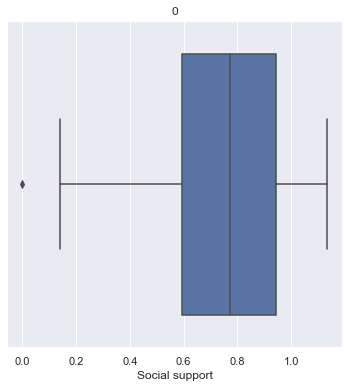

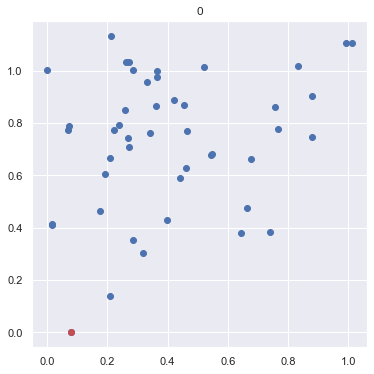

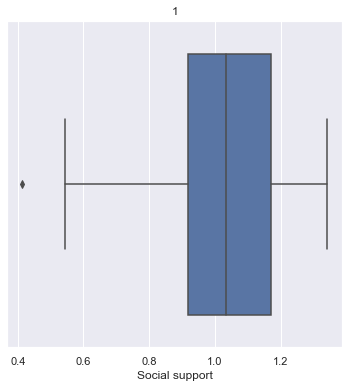

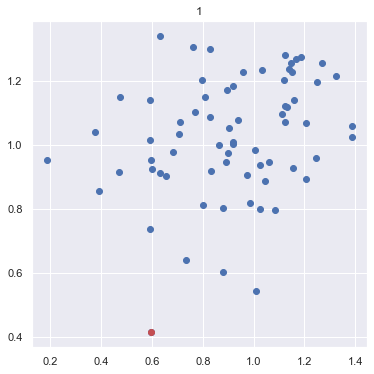

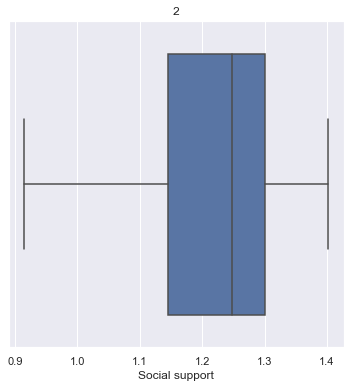

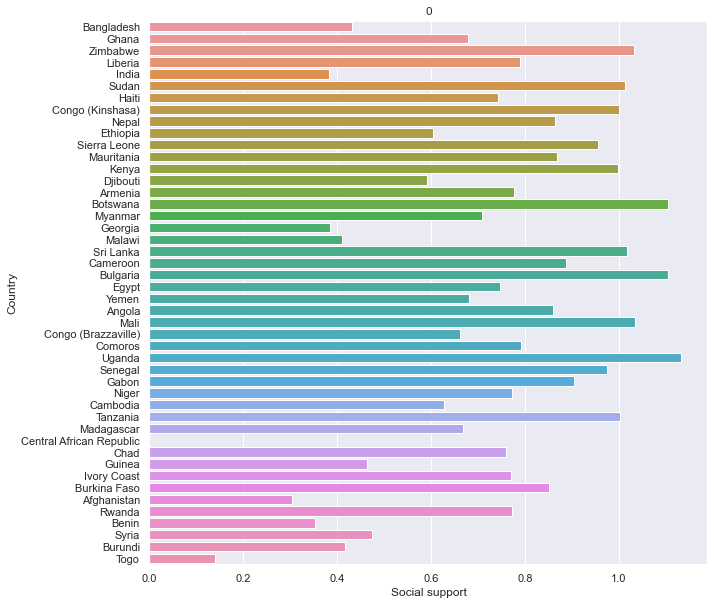

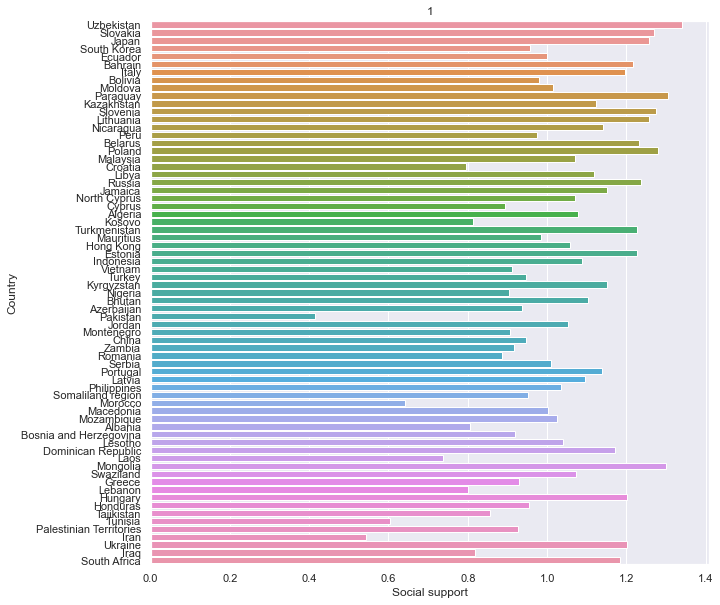

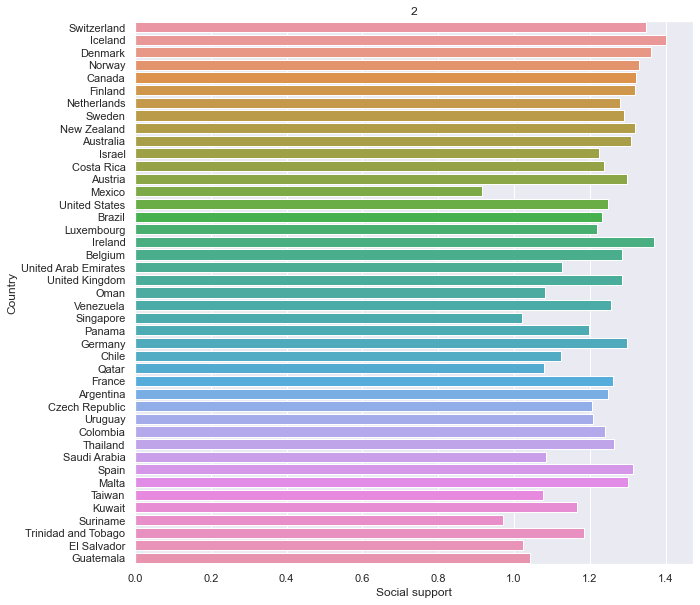

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230,0
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709,1


In [401]:
outliers=boxplot(clustered_2015,"Social support")
bar_plot(clustered_2015,"Social support")
outliers

The two countries at hand do not value social support as much as the others. This might be explained by the difference in culture. It might be due to the fact that the culture is saturated with social support to the point that it becomes the norm and therefore its impact is not as valuable to the citizens in this year.

In [402]:
#handling(clustered_2015,outliers,"Social support")

[0]
[1.13299]
Done
[0]
[1.34043]
Done
Done


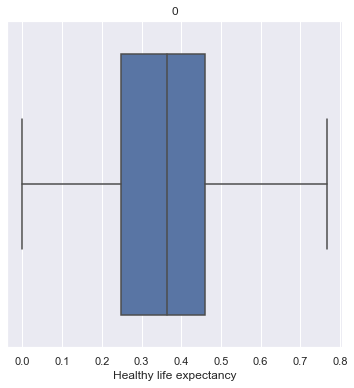

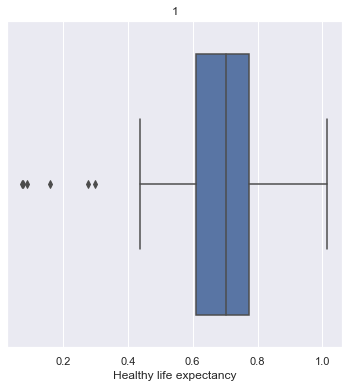

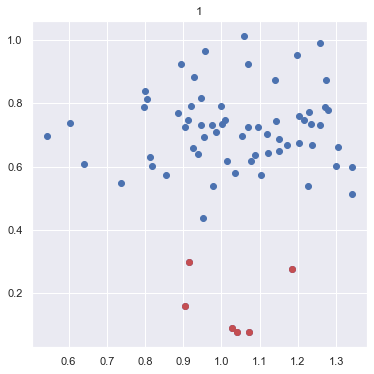

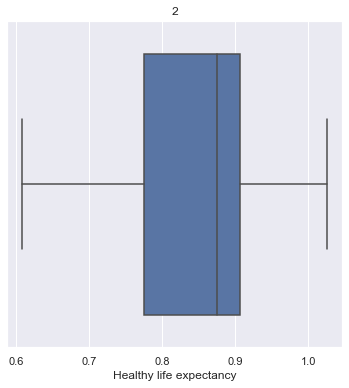

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319,1
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430,1
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,1.38604,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137,1
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832,1
100,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676,1
112,South Africa,Sub-Saharan Africa,113,4.642,0.04585,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956,1


In [403]:
outliers=boxplot(clustered_2015,"Healthy life expectancy")
outliers

The countries here do not value life expectancy as much as the other nations that belong in the same cluster. These are also valid numbers because the way that a country values a long life expectancy is complex and is highly interleaved with the culture. 

In [404]:
#handling(clustered_2015,outliers,"Healthy life expectancy")

Done
[3]
[0.09131]
[4]
[0.27688]
[2]
[0.07612]
[1]
[0.07566]
[0]
[1.01328]
[0]
[1.01328]
Done
Done


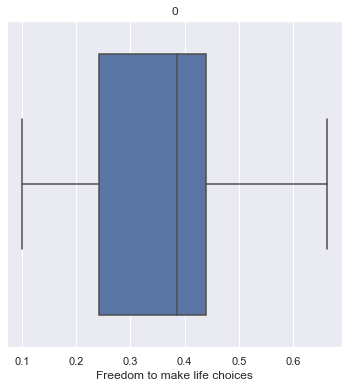

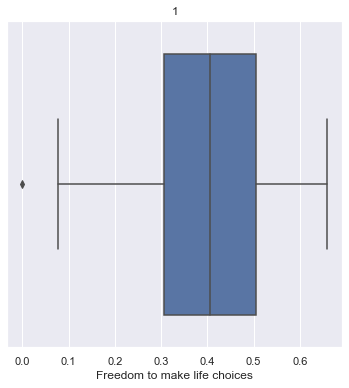

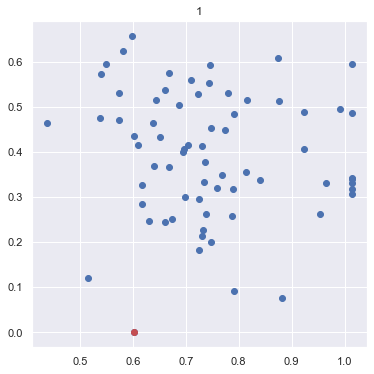

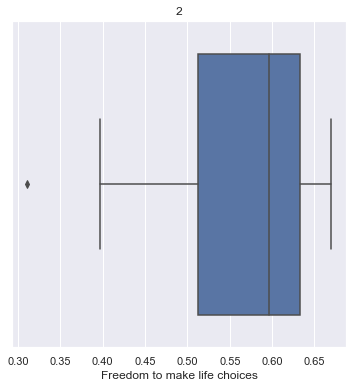

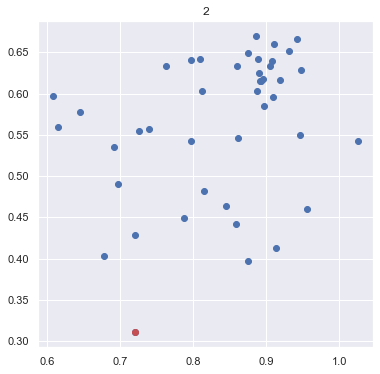

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335,1
34,Saudi Arabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872,2


In [405]:
outliers=boxplot(clustered_2015,"Freedom to make life choices")
outliers

The values shown for these 2 countries are lower than the norm. This is normal because some cultures do not have the full freedom to make life choices, so the culture got used to it and people do not consider it an important happiness factor. 

In [406]:
#handling(clustered_2015,outliers,"Freedom to make life choices")

Done
[0]
[0.65821]
Done
[0]
[0.66973]
Done


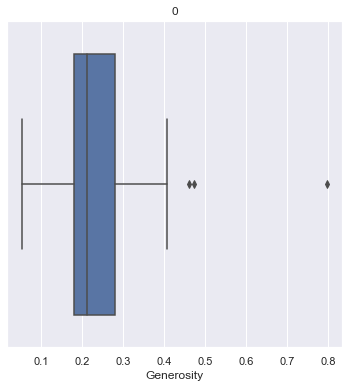

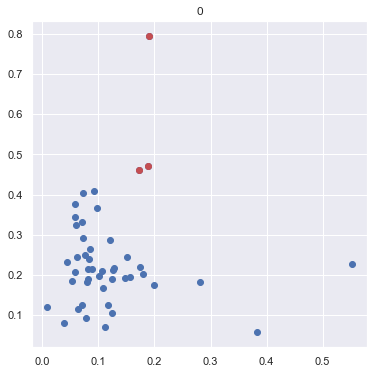

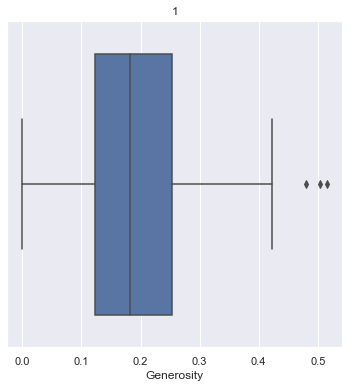

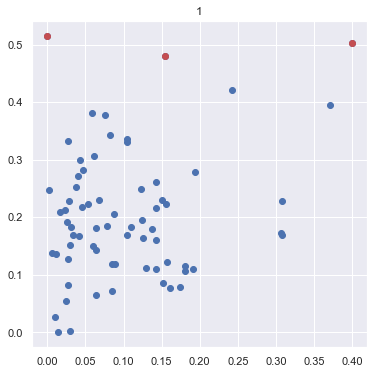

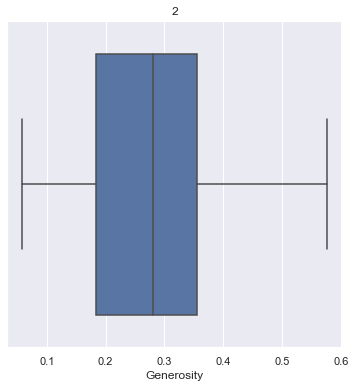

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
118,Haiti,Latin America and Caribbean,119,4.518,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173,0
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805,0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399,1
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794,1
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,1


In [407]:
outliers=boxplot(clustered_2015,"Generosity")
outliers

The countries shown here do not value generosity as much as the rest of the countries in their cluster. This is due to the nature of the culture as well.

In [408]:
#handling(clustered_2015,outliers,"Generosity")

[43]
[0.40828]
[44]
0.40359
[43]
0.37542
Done
[68]
0.42191999999999996
[66]
[0.42192]
[66]
0.38086
Done
Done


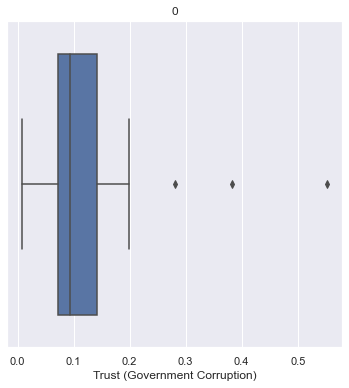

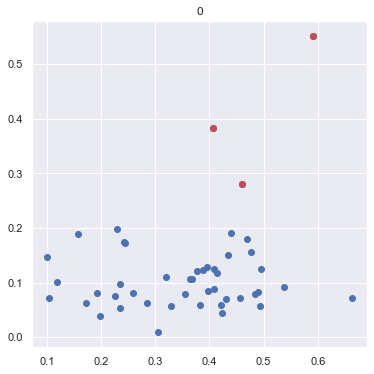

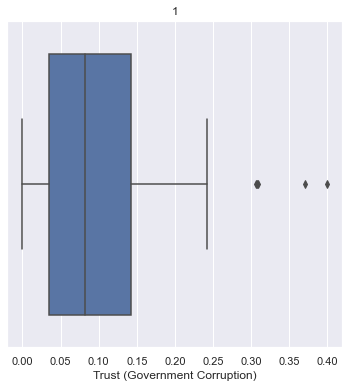

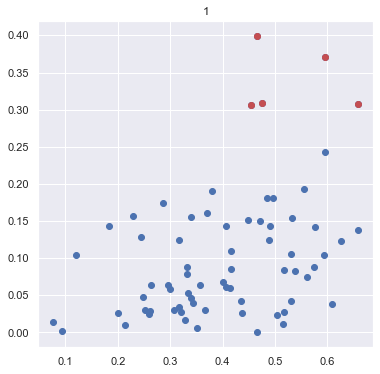

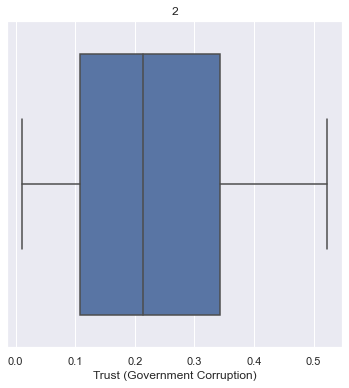

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
125,Djibouti,Sub-Saharan Africa,126,4.369,0.08096,0.44025,0.59207,0.36291,0.46074,0.28105,0.18093,2.05125,0
129,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541,0
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,1
48,Bahrain,Middle East and Northern Africa,49,5.960,0.05412,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362,1.73797,1
69,Turkmenistan,Central and Eastern Europe,70,5.548,0.04175,0.95847,1.22668,0.53886,0.47610,0.30844,0.16979,1.86984,1
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429,1
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.38086,2.11032,1


In [409]:
outliers=boxplot(clustered_2015,"Trust (Government Corruption)")
outliers

The countries are outliers because there is a high government trust factor as compared to the rest. Again this is a matter of culture and there is no clear indicator that the values are a result of some error that should be corrected.

In [410]:
#handling(clustered_2015,outliers,"Trust (Government Corruption)")

[43]
[0.199]
[43]
[0.199]
[43]
0.18905999999999998
Done
[65]
[0.306]
[64]
[0.24249]
[64]
[0.24249]
[64]
[0.24249]
[64]
0.1909
Done
Done


## 2016

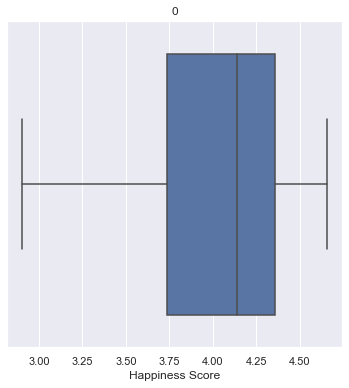

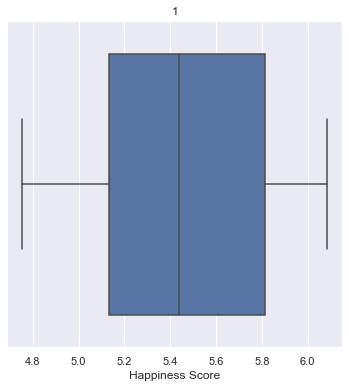

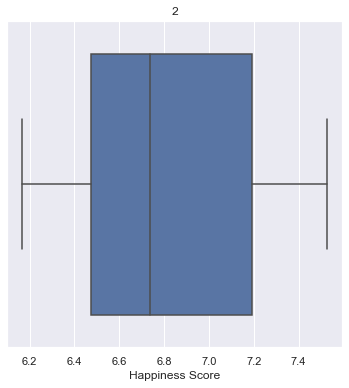

In [411]:
outliers=boxplot(clustered_2016,"Happiness Score")

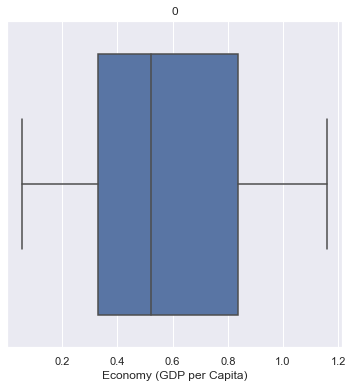

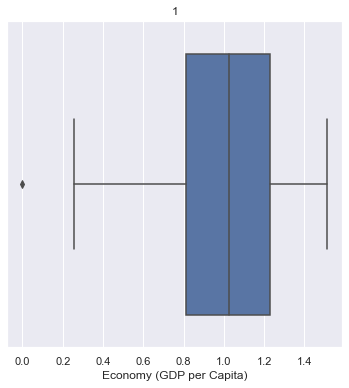

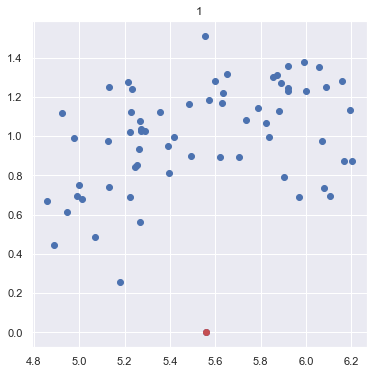

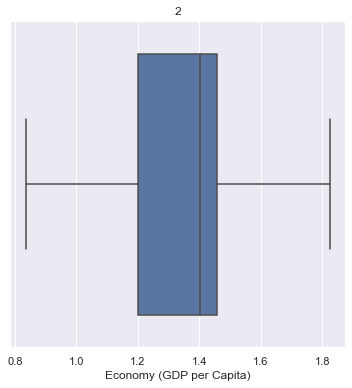

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
75,Somalia,Sub-Saharan Africa,76,5.44,5.321,5.559,0.0,0.33613,0.11466,0.56778,0.3118,0.27225,3.83772,1


In [412]:
outliers=boxplot(clustered_2016,"Economy (GDP per Capita)")
outliers

Somalia is an outlier in its cluster. GDP is not valued as much as the other countries. There is no indication that this value is due to noise, and could be explained by the cultural reasons discussed above

In [413]:
#handling(clustered_2016,outliers,"Economy (GDP per Capita)")

Done
[0]
[1.5107]
Done
Done


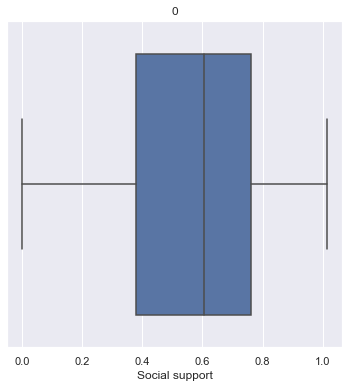

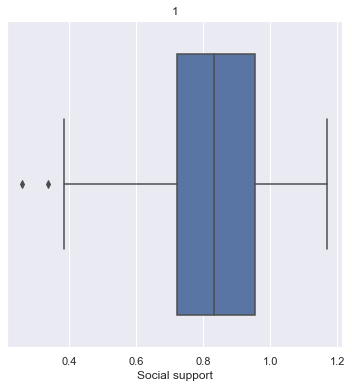

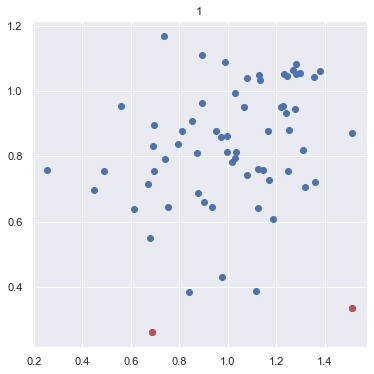

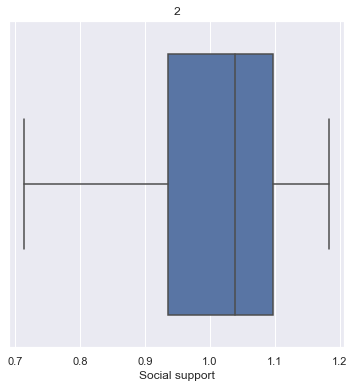

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,1.51070,0.33613,0.11466,0.56778,0.3118,0.27225,3.83772,1
91,Pakistan,Southern Asia,92,5.132,5.038,5.226,0.68816,0.26135,0.40306,0.14622,0.1388,0.31185,3.18286,1


In [414]:
outliers=boxplot(clustered_2016,"Social support")
outliers

The outliers will not be handled for the same reason discussed above

In [415]:
#handling(clustered_2016,outliers,"Social support")
# clustered_2015.to_csv(root_path_happiness+'2015 cl.csv')

Done
[1]
[0.26135]
[0]
[1.1681]
Done
Done


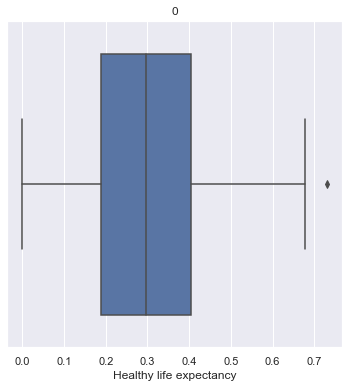

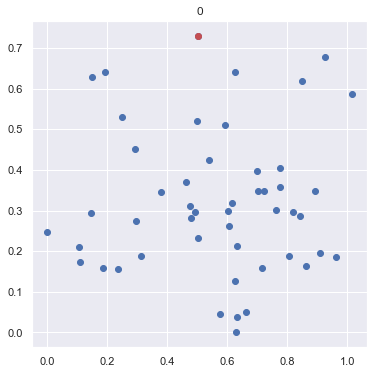

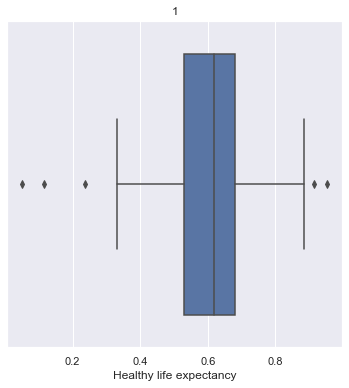

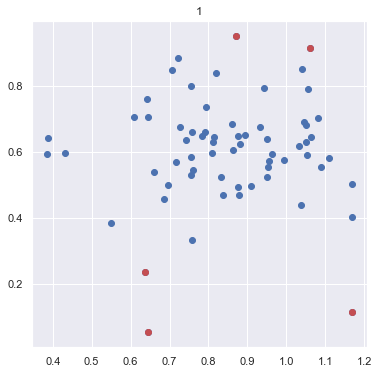

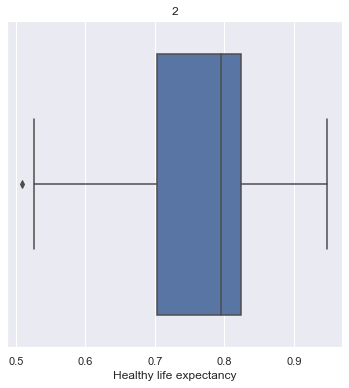

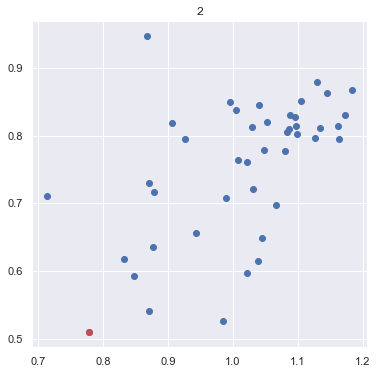

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
108,Albania,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,0
52,Japan,Eastern Asia,53,5.921,5.850,5.992,1.38007,1.06054,0.91491,0.46761,0.18985,0.10224,1.80584,1
74,Hong Kong,Eastern Asia,75,5.458,5.362,5.554,1.51070,0.87021,0.95277,0.48079,0.31647,0.40097,0.92614,1
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,1.51070,1.16810,0.11466,0.56778,0.31180,0.27225,3.83772,1
102,Nigeria,Sub-Saharan Africa,103,4.875,4.750,5.000,0.75216,0.64498,0.05108,0.27854,0.03050,0.23219,2.88586,1
105,Zambia,Sub-Saharan Africa,106,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991,1
39,Suriname,Latin America and Caribbean,40,6.269,6.073,6.465,1.09686,0.77866,0.50933,0.52234,0.12692,0.16665,3.06852,2


In [416]:
outliers=boxplot(clustered_2016,"Healthy life expectancy")
outliers

Life expectancy factor is low in the countries in developing countries. This is expected behaviour as the life expectancy is naturally low in these countries this is contrasted with Japan's high value contribution. Japan is known worldwide for the high life expectancy of its citizens so it is expected that the life expectacy would be an important factor in the happiness of its citizens.

In [417]:
#handling(clustered_2016,outliers,"Healthy life expectancy")

[48]
0.64035
Done
[63]
[0.88645]
[63]
0.8488
[1]
[0.05108]
[0]
[0.88645]
[0]
[0.88645]
Done
[0]
[0.94719]
Done


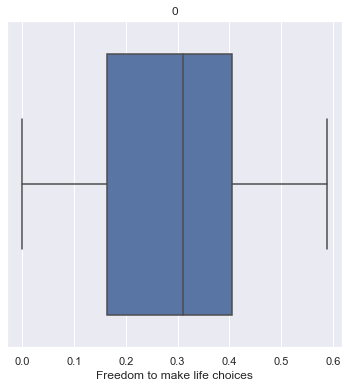

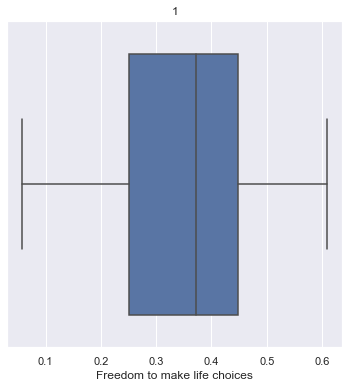

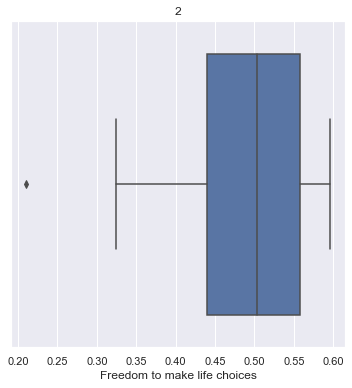

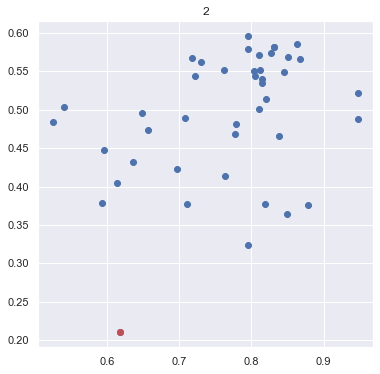

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
37,Algeria,Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,2


In [418]:
outliers=boxplot(clustered_2016,"Freedom to make life choices")
outliers

Perhaps Algeria's government system does not emphasis the importance of individuals making their own life choices 100% autonomously as much as countries in the same cluster as Algeria. So it is expected that the factor will have a low contribution. Again this value will not be considered wrong nor smoothed.

In [419]:
#handling(clustered_2016,outliers,"Freedom to make life choices")

Done
Done
[0]
[0.59609]
Done


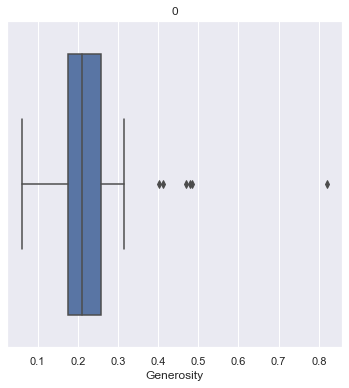

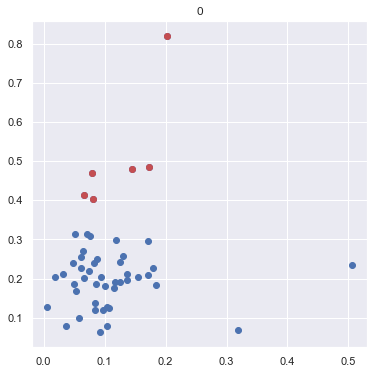

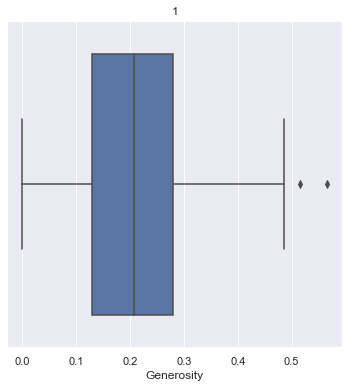

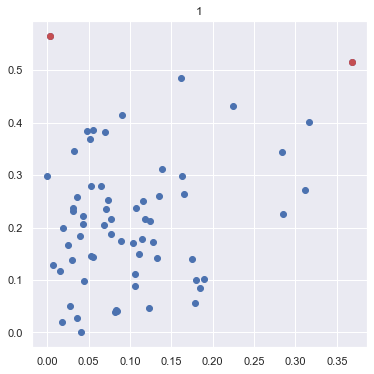

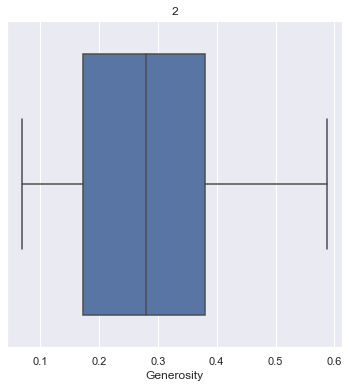

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
116,Sri Lanka,Southern Asia,117,4.415,4.322,4.508,0.97318,0.84783,0.62007,0.50817,0.07964,0.46978,0.91681,0
118,Myanmar,Southeastern Asia,119,4.395,4.327,4.463,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971,1.50655,0
121,Kenya,Sub-Saharan Africa,122,4.356,4.259,4.453,0.52267,0.76240,0.30147,0.40576,0.06686,0.41328,1.88326,0
135,Haiti,Latin America and Caribbean,136,4.028,3.893,4.163,0.34097,0.29561,0.27494,0.12072,0.14476,0.47958,2.37116,0
139,Cambodia,Southeastern Asia,140,3.907,3.798,4.016,0.55604,0.53750,0.42494,0.58852,0.08092,0.40339,1.31573,0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,0
78,Indonesia,Southeastern Asia,79,5.314,5.237,5.391,0.95104,0.87625,0.49374,0.39237,0.00322,0.56521,2.03171,1
96,Somaliland Region,Sub-Saharan Africa,97,5.057,4.934,5.180,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801,1


In [420]:
outliers=boxplot(clustered_2016,"Generosity")
outliers

Due to the same reasons as above, we will not be considering those values as outliers and will not be smoothing them

In [421]:
#handling(clustered_2016,outliers,"Generosity")

[45]
[0.41328]
[47]
0.41328000000000004
[44]
[0.40339]
[44]
[0.40339]
[43]
[0.31472]
[43]
0.30968
Done
[64]
0.43078999999999995
[63]
0.41473999999999994
Done
Done


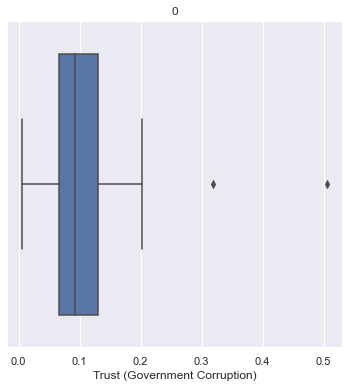

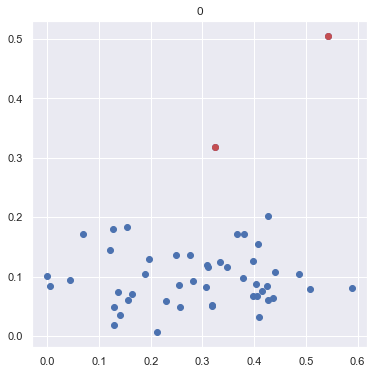

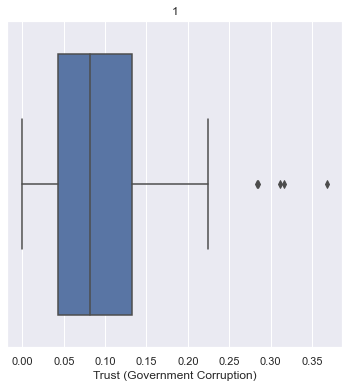

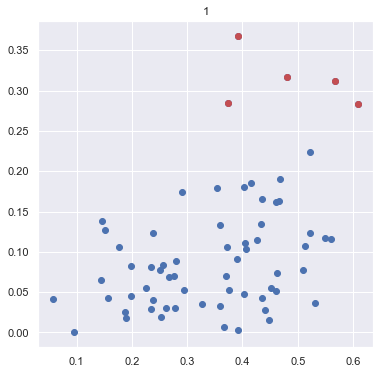

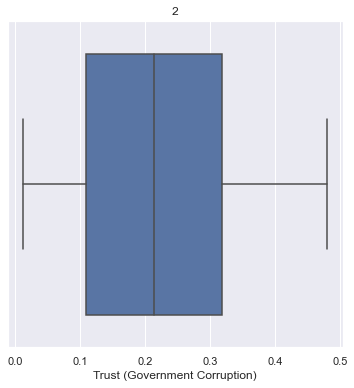

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual,Cluster
125,Georgia,Central and Eastern Europe,126,4.252,4.164,4.340,0.83792,0.19249,0.64035,0.32461,0.31880,0.06786,1.87031,0
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,0
48,Uzbekistan,Central and Eastern Europe,49,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638,1
64,Turkmenistan,Central and Eastern Europe,65,5.658,5.580,5.736,1.08017,1.03817,0.44006,0.37408,0.28467,0.22567,2.21489,1
74,Hong Kong,Eastern Asia,75,5.458,5.362,5.554,1.51070,0.87021,0.84880,0.48079,0.31647,0.40097,0.92614,1
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,1.51070,1.16810,0.88645,0.56778,0.31180,0.27225,3.83772,1
96,Somaliland Region,Sub-Saharan Africa,97,5.057,4.934,5.180,0.25558,0.75862,0.33108,0.39130,0.36794,0.41474,2.43801,1


In [422]:
outliers=boxplot(clustered_2016,"Trust (Government Corruption)")
outliers

In [423]:
#handling(clustered_2016,outliers,"Trust (Government Corruption)")

[47]
[0.20243]
[47]
0.17955
Done
[60]
[0.22423]
[60]
[0.22423]
[61]
[0.3118]
[60]
[0.22423]
[60]
0.18519000000000002
Done
Done


## 2017

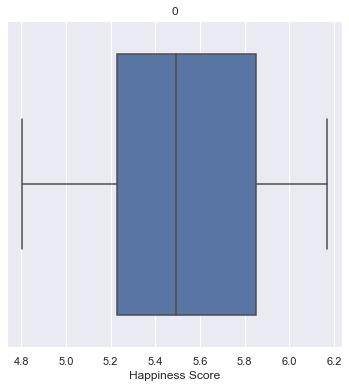

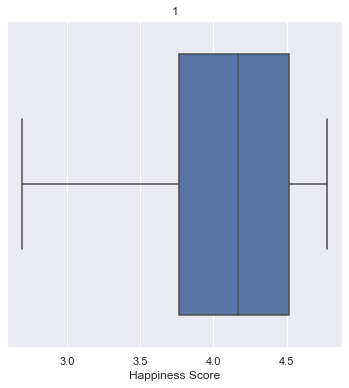

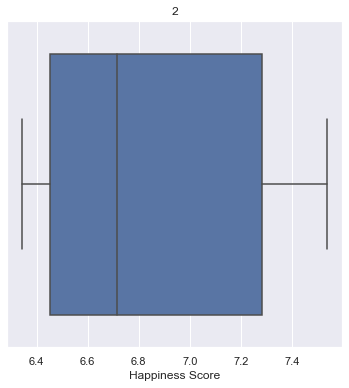

In [424]:
outliers=boxplot(clustered_2017,"Happiness Score")

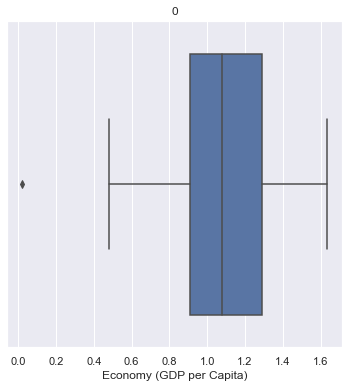

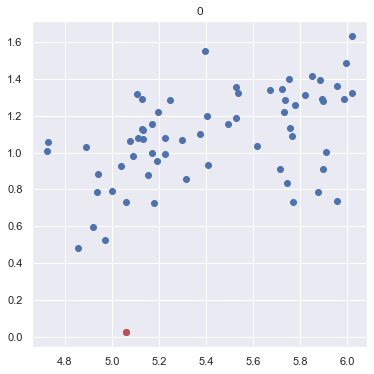

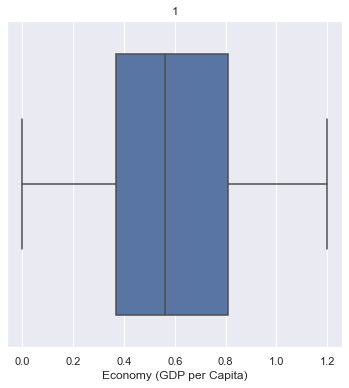

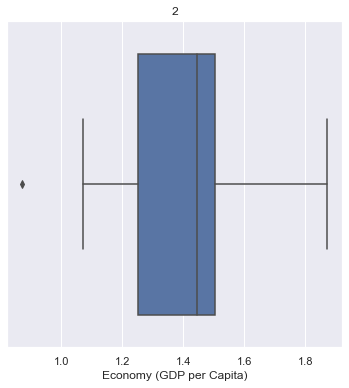

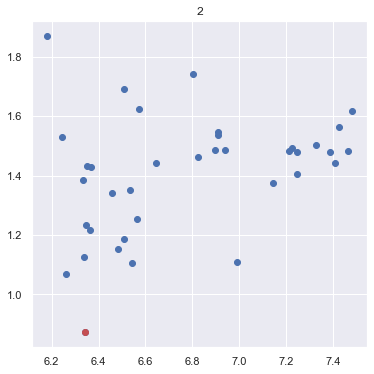

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
92,Somalia,93,5.151,5.242484,5.059516,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,0
28,Guatemala,29,6.454,6.566874,6.341126,0.872002,1.255585,0.540240,0.531311,0.283488,0.077223,2.893891,2


In [425]:
outliers=boxplot(clustered_2017,"Economy (GDP per Capita)")
outliers

These countries are developing and naturally have a low GDP, the low values here are due to culture and circumstances of each country and as done before we will not be  handling them

In [426]:
#handling(clustered_2017,outliers,"Economy (GDP per Capita)")

[0]
[1.63295245]
Done
Done
[0]
[1.87076569]
Done


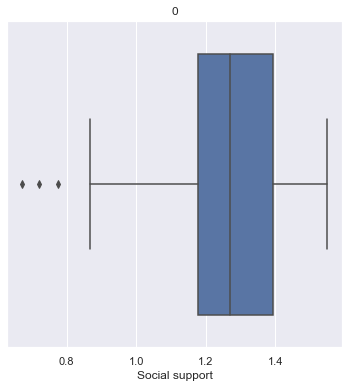

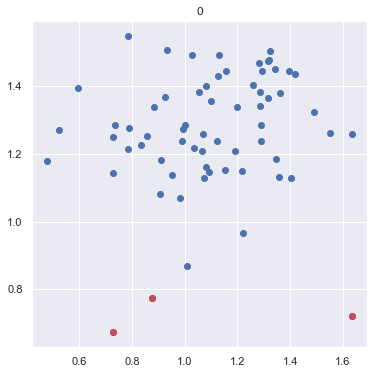

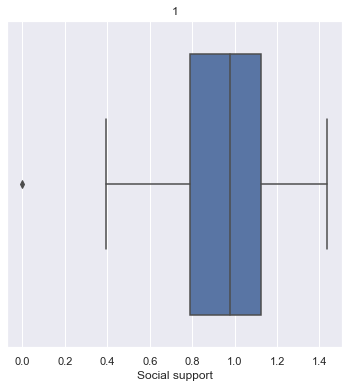

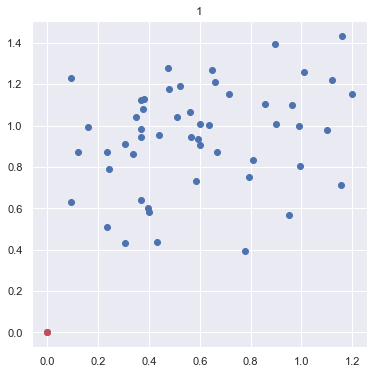

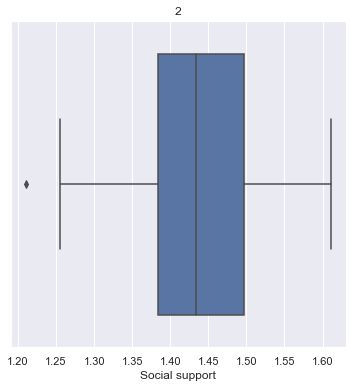

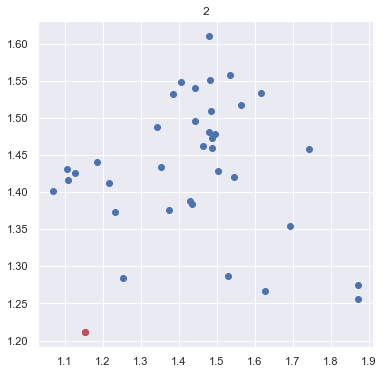

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
79,Pakistan,80,5.269,5.359984,5.178016,0.726884,0.672691,0.402048,0.235215,0.315446,0.124348,2.792489,0
83,Morocco,84,5.235,5.318341,5.151659,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189,0
92,Somalia,93,5.151,5.242484,5.059516,1.632952,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,0
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,1
24,Mexico,25,6.578,6.671149,6.484851,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,2


In [427]:
outliers=boxplot(clustered_2017,"Social support")
outliers

Due to the same reasons as above we will not be considering these values wrong, just display interesting phenomena.

In [428]:
#handling(clustered_2017,outliers,"Social support")
# clustered_2015.to_csv(root_path_happiness+'2015 cl.csv')

[0]
[1.54896915]
[1]
[0.72115135]
[0]
[1.54896915]
Done
[0]
[1.43437946]
Done
[0]
[1.61057401]
Done


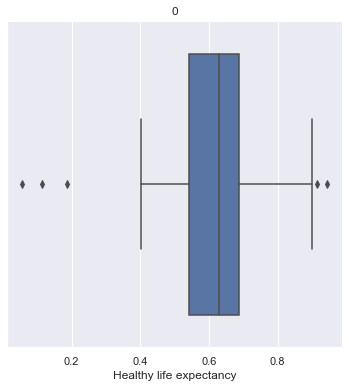

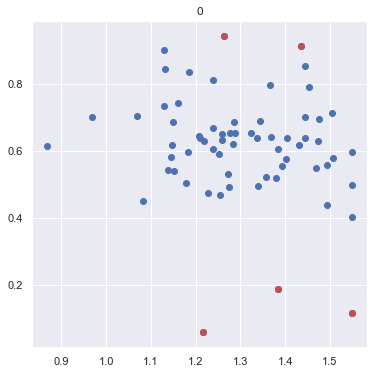

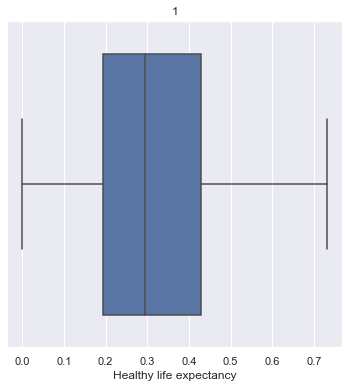

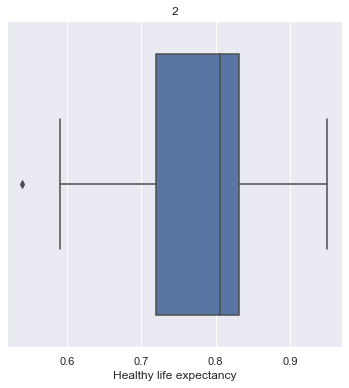

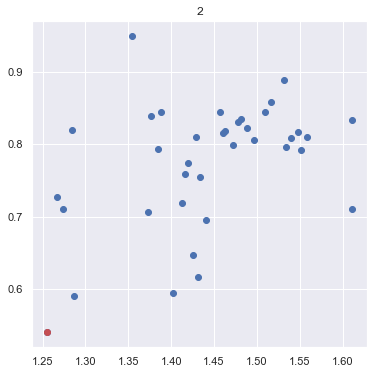

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
50,Japan,51,5.920,5.990719,5.849281,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224,0
70,"Hong Kong S.A.R., China",71,5.472,5.549594,5.394406,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,0
92,Somalia,93,5.151,5.242484,5.059516,1.632952,1.548969,0.113989,0.602127,0.291631,0.282410,3.117485,0
94,Nigeria,95,5.074,5.209500,4.938500,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391,0
100,South Africa,101,4.829,4.929435,4.728565,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909,0
28,Guatemala,29,6.454,6.566874,6.341126,1.870766,1.255585,0.540240,0.531311,0.283488,0.077223,2.893891,2


In [429]:
outliers=boxplot(clustered_2017,"Healthy life expectancy")
outliers

We also notice that Japan is an outlier here again, this means that it is in fact not noise or wrong values inputted but in fact true values that just deviate from the norm. This is natural as complete homogenity is very rare.

In [430]:
#handling(clustered_2017,outliers,"Healthy life expectancy")

[63]
[0.90021408]
[63]
0.84471470117569
[1]
[0.05691573]
[0]
[0.90021408]
[0]
[0.90021408]
Done
Done
[0]
[0.94949239]
Done


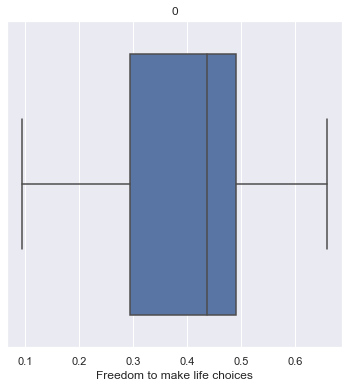

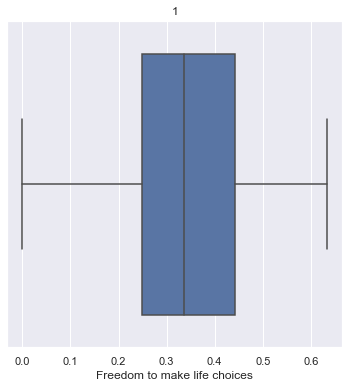

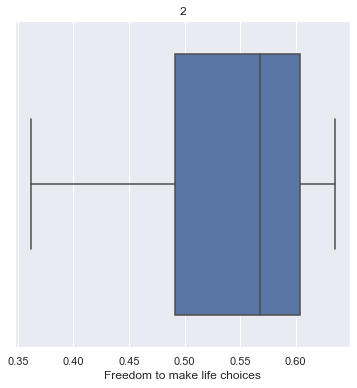

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster


In [431]:
outliers=boxplot(clustered_2017,"Freedom to make life choices")
outliers

In [432]:
#handling(clustered_2017,outliers,"Freedom to make life choices")

Done
Done
Done


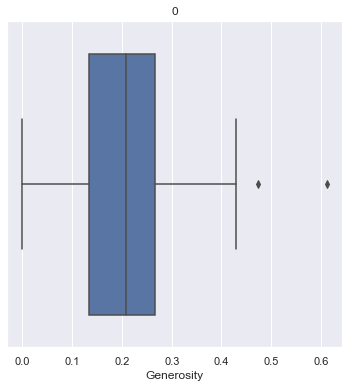

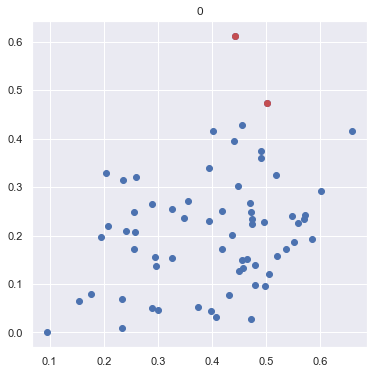

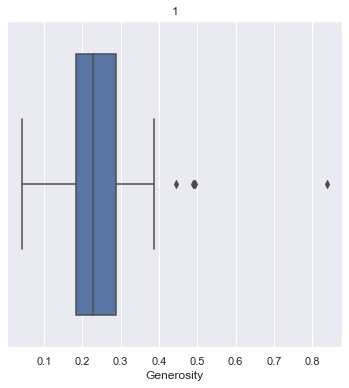

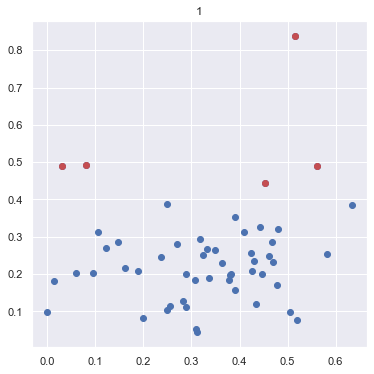

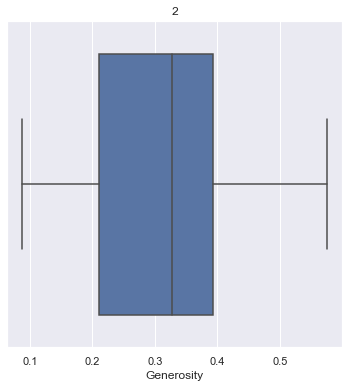

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
80,Indonesia,81,5.262,5.352889,5.171112,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,1.429477,0
96,Bhutan,97,5.011,5.079335,4.942666,0.885416,1.340127,0.495879,0.501538,0.474055,0.173380,1.140184,0
111,Kenya,112,4.553,4.655692,4.450308,0.560479,1.067951,0.309988,0.452764,0.444860,0.064641,1.651902,1
113,Myanmar,114,4.545,4.614740,4.475260,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,1.115290,1
119,Sri Lanka,120,4.440,4.553447,4.326553,1.009850,1.259976,0.625131,0.561213,0.490864,0.073654,0.419389,1
144,Haiti,145,3.603,3.734715,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,1
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,1


In [433]:
outliers=boxplot(clustered_2017,"Generosity")
outliers

We realise that some countries are common as the year before it, and this further proves that the outlier behaviour is normal and not a result of errors in input and therefore will not be smoothed.

In [434]:
#handling(clustered_2017,outliers,"Generosity")

[64]
0.416608929634094
[63]
0.41598364710807795
Done
[48]
[0.38724291]
[51]
0.48920378088951094
[49]
[0.48920378]
[48]
[0.38724291]
[48]
0.354256361722946
Done
Done


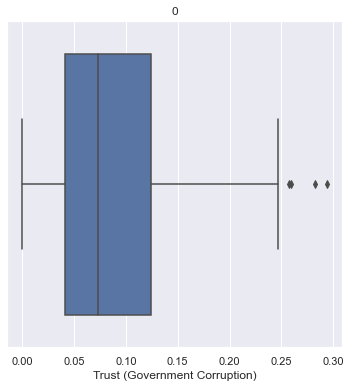

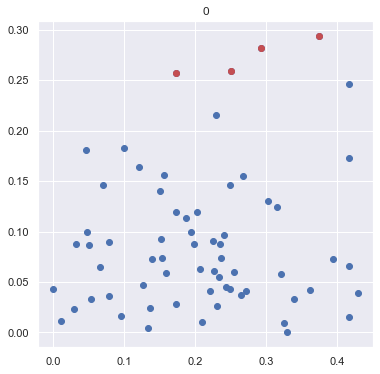

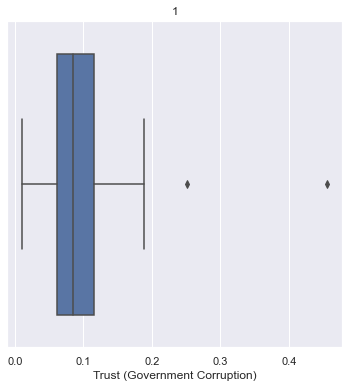

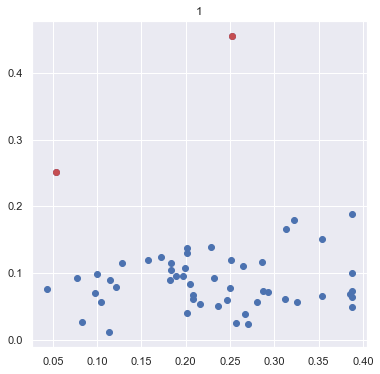

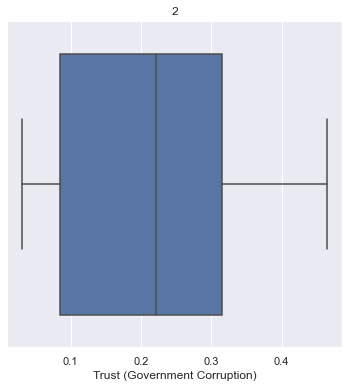

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia Residual,Cluster
40,Bahrain,41,6.087,6.178989,5.995011,1.488412,1.323110,0.653133,0.536747,0.172668,0.257042,1.656149,0
58,Turkmenistan,59,5.822,5.885181,5.758819,1.130777,1.493149,0.437726,0.418272,0.249925,0.259270,1.832910,0
70,"Hong Kong S.A.R., China",71,5.472,5.549594,5.394406,1.551675,1.262791,0.844715,0.490969,0.374466,0.293934,0.554633,0
92,Somalia,93,5.151,5.242484,5.059516,1.632952,1.548969,0.900214,0.602127,0.291631,0.282410,3.117485,0
124,Georgia,125,4.286,4.374934,4.197066,0.950613,0.570615,0.649547,0.309410,0.054009,0.251667,1.500138,1
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,1


In [435]:
outliers=boxplot(clustered_2017,"Trust (Government Corruption)")
outliers

The persistence of behaviour implies that the values just display correct behaviour that just deviates from the norm. Due to the same reasons we will not be smoothing them.

In [436]:
#handling(clustered_2017,outliers,"Trust (Government Corruption)")

[61]
[0.24652822]
[61]
[0.24652822]
[62]
0.21515955030918102
[61]
0.18324892222881303
Done
[51]
[0.1888162]
[51]
0.16545571386814098
Done
Done


## 2018

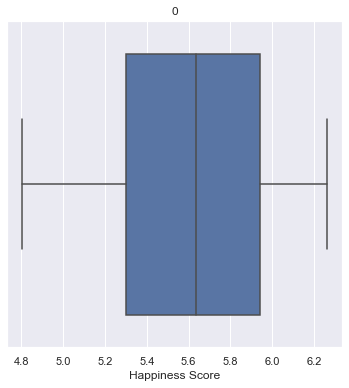

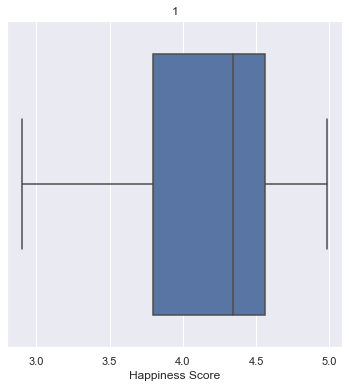

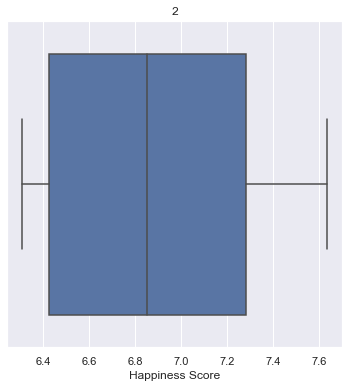

In [437]:
outliers=boxplot(clustered_2018,"Happiness Score")

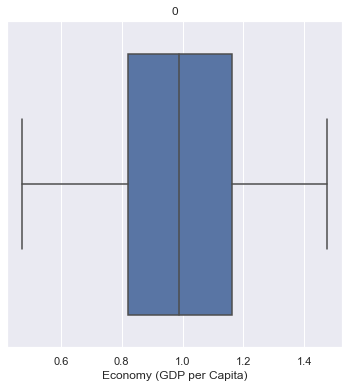

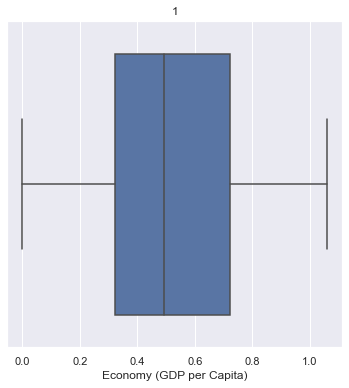

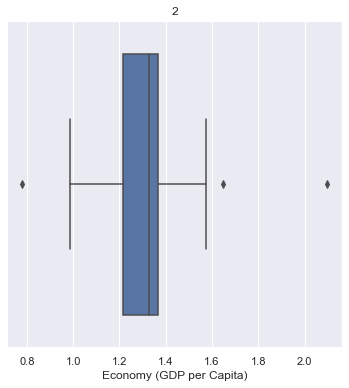

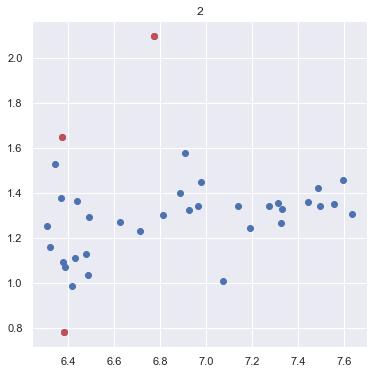

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,0.000,2
29,30,Guatemala,6.382,0.781,1.268,0.608,0.604,0.179,0.071,2
31,32,Qatar,6.374,1.649,1.303,0.748,0.654,0.256,0.171,2


In [438]:
outliers=boxplot(clustered_2018,"Economy (GDP per Capita)")
outliers

Qatar and UAE are very financially stable, so you would expect GDP to be an important factor which is the case here. Guatemala is the contrast. Therefore we will not be smoothing the outliers.

In [439]:
#handling(clustered_2018,outliers,"Economy (GDP per Capita)")

Done
Done
[35]
1.5290000000000001
[0]
[1.649]
[33]
1.456
Done


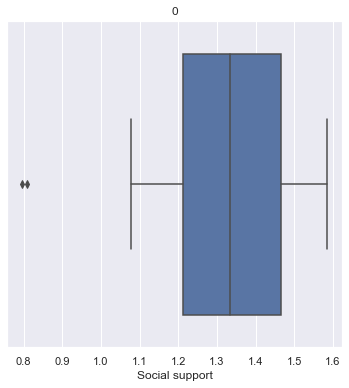

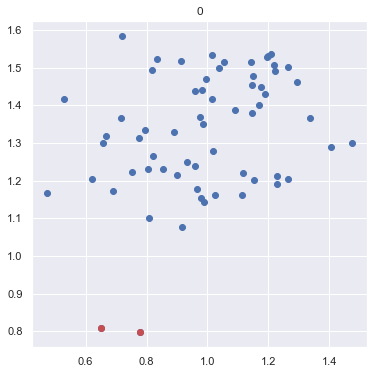

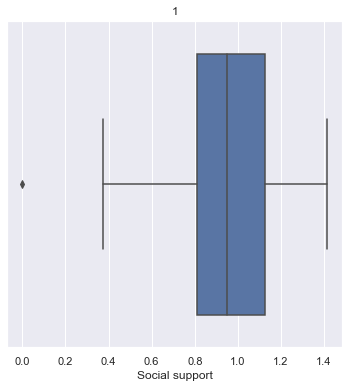

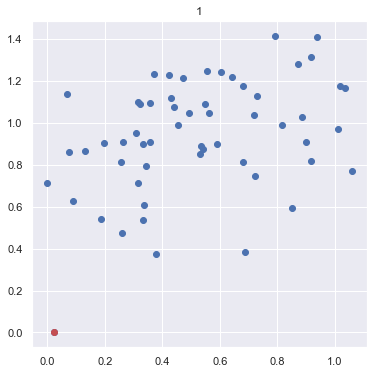

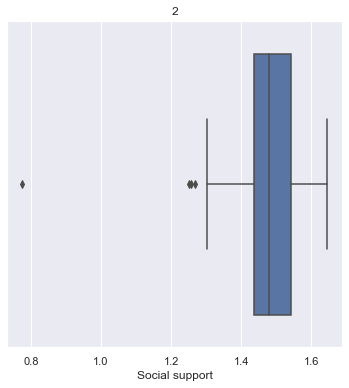

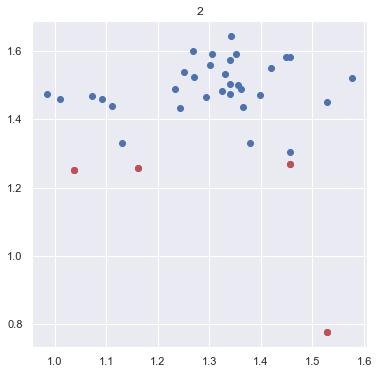

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
74,75,Pakistan,5.472,0.652,0.810,0.424,0.334,0.216,0.113,0
84,85,Morocco,5.254,0.779,0.797,0.669,0.460,0.026,0.074,0
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,1
19,20,United Arab Emirates,6.774,1.529,0.776,0.670,0.284,0.186,0.000,2
23,24,Mexico,6.488,1.038,1.252,0.761,0.479,0.069,0.095,2
29,30,Guatemala,6.382,1.456,1.268,0.608,0.604,0.179,0.071,2
34,35,Malaysia,6.322,1.161,1.258,0.669,0.356,0.311,0.059,2


In [440]:
outliers=boxplot(clustered_2018,"Social support")
outliers

The same behaviour persists over time and spans multiple datasets therefore this further proves the point that they are correct values that should be kept.

In [441]:
#handling(clustered_2018,outliers,"Social support")
# clustered_2015.to_csv(root_path_happiness+'2015 cl.csv')

[1]
[0.797]
[0]
[1.584]
Done
[0]
[1.413]
Done
[0]
[1.644]
[0]
[1.644]
[1]
[1.258]
[0]
[1.644]
Done


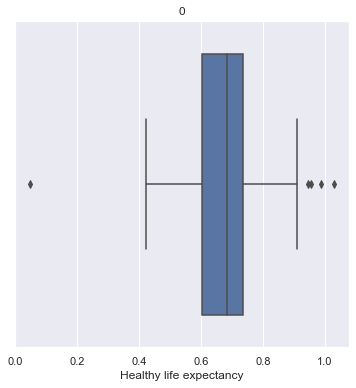

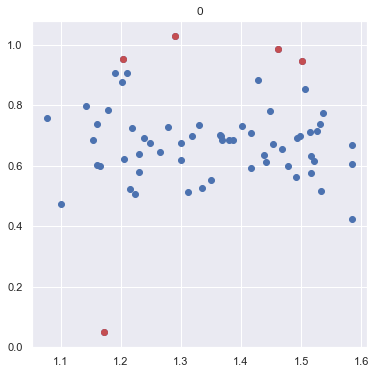

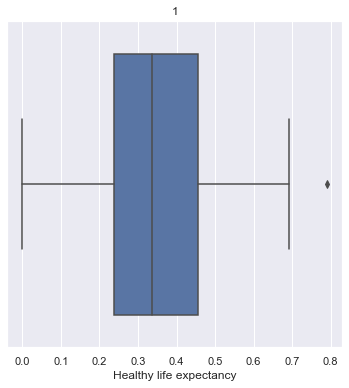

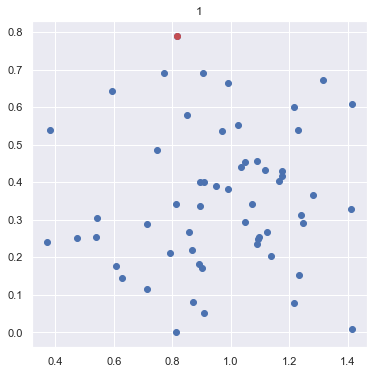

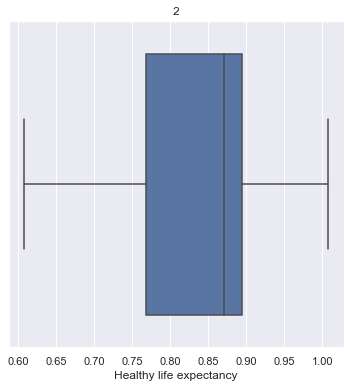

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
46,47,Italy,6.000,1.264,1.501,0.946,0.281,0.137,0.028,0
53,54,Japan,5.915,1.294,1.462,0.988,0.553,0.079,0.150,0
56,57,South Korea,5.875,1.266,1.204,0.955,0.244,0.175,0.051,0
75,76,Hong Kong,5.430,1.405,1.290,1.030,0.524,0.246,0.291,0
90,91,Nigeria,5.155,0.689,1.172,0.048,0.462,0.201,0.032,0
111,112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032,1


In [442]:
outliers=boxplot(clustered_2018,"Healthy life expectancy")
outliers

The countries intersect with previous countries which further proves that we should not reduce the effect of those values.

In [443]:
#handling(clustered_2018,outliers,"Healthy life expectancy")

[59]
[0.909]
[60]
[0.955]
[59]
[0.909]
[59]
0.884
[0]
[0.909]
Done
[56]
0.672
Done
Done


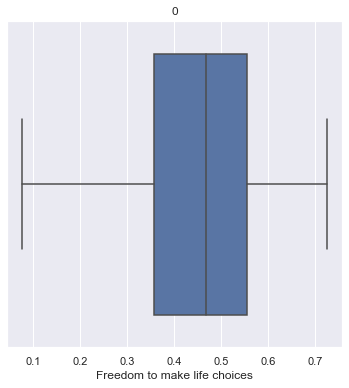

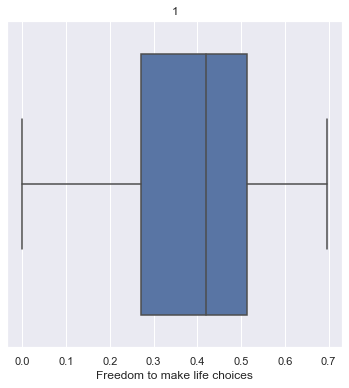

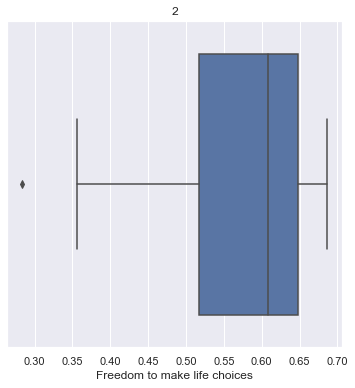

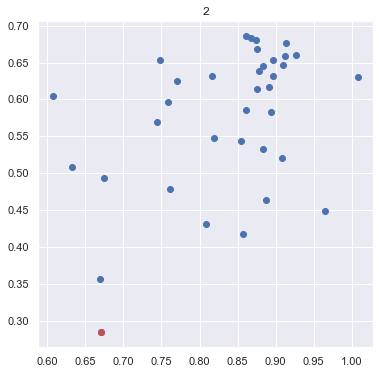

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
19,20,United Arab Emirates,6.774,1.529,1.644,0.67,0.284,0.186,0.0,2


In [444]:
outliers=boxplot(clustered_2018,"Freedom to make life choices")
outliers

In the UAE the culture is not very much about freedome to make life choices as there are constraints imposed by the government and the culture. Therefore this behaviour is valid and will not be smoothed.

In [445]:
handling(clustered_2018,outliers,"Freedom to make life choices")

Done
Done
[0]
[0.686]
Done


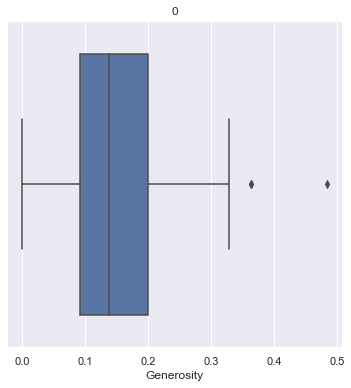

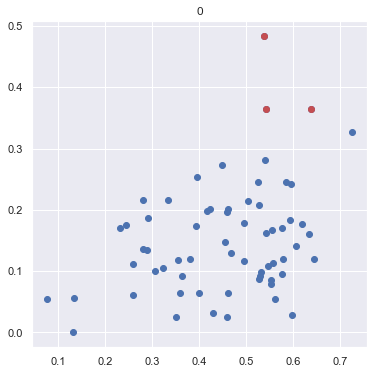

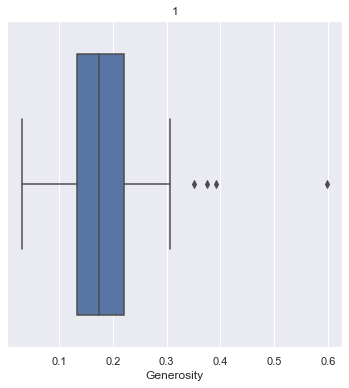

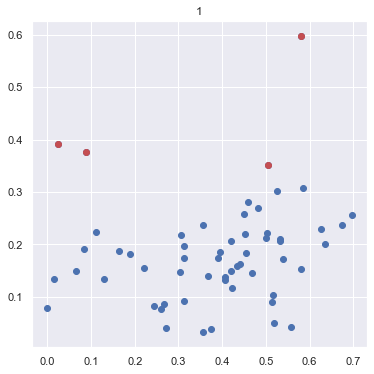

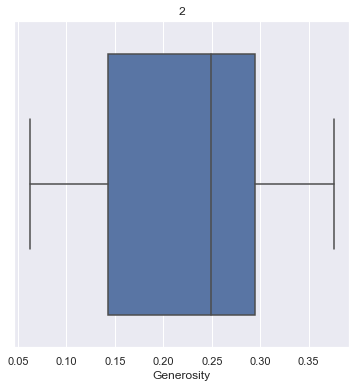

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
45,46,Thailand,6.072,1.016,1.417,0.707,0.637,0.364,0.029,0
95,96,Indonesia,5.093,0.899,1.215,0.522,0.538,0.484,0.018,0
96,97,Bhutan,5.082,0.796,1.335,0.527,0.541,0.364,0.171,0
123,124,Kenya,4.410,0.493,1.048,0.454,0.504,0.352,0.055,1
129,130,Myanmar,4.308,0.682,1.174,0.429,0.580,0.598,0.178,1
147,148,Haiti,3.582,0.315,0.714,0.289,0.025,0.392,0.104,1
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144,1


In [446]:
outliers=boxplot(clustered_2018,"Generosity")
outliers

For the same reasons, we will not be reducing the effect of the outliers in this case because the factor is very case and culture specific.

In [447]:
#handling(clustered_2018,outliers,"Generosity")

[60 61]
[0.328 0.484]
[60]
0.27399999999999997
[]
Done
[53]
[0.307]
[55]
0.307
[54]
0.302
[53]
0.282
Done
Done


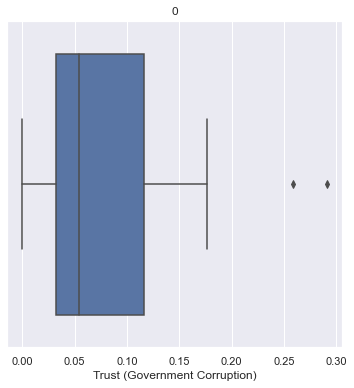

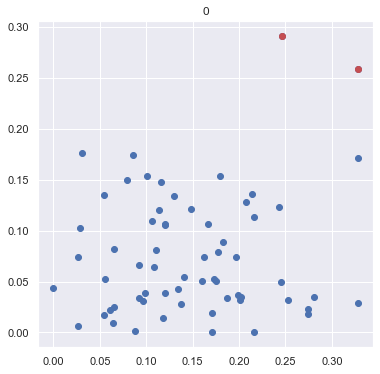

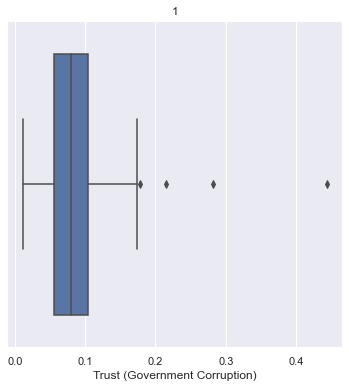

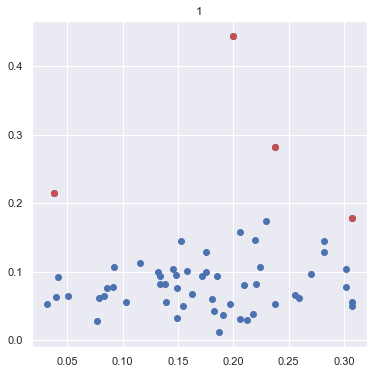

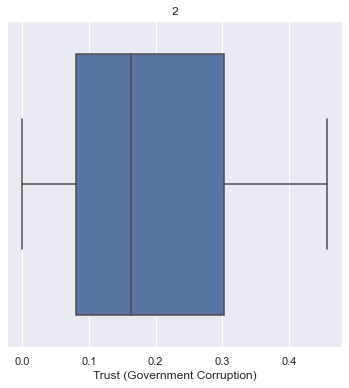

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
43,44,Uzbekistan,6.096,0.719,1.584,0.605,0.724,0.328,0.259,0
75,76,Hong Kong,5.430,1.405,1.290,0.884,0.524,0.246,0.291,0
97,98,Somalia,4.982,0.000,0.712,0.115,0.674,0.238,0.282,1
127,128,Georgia,4.340,0.853,0.592,0.643,0.375,0.038,0.215,1
129,130,Myanmar,4.308,0.682,1.174,0.429,0.580,0.307,0.178,1
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,1


In [448]:
outliers=boxplot(clustered_2018,"Trust (Government Corruption)")
outliers

The countries do not typically value transparency in their government strategies, therfore it is normal for the government corruption to be at a high value.

In [449]:
#handling(clustered_2018,outliers,"Trust (Government Corruption)")

[61]
[0.176]
[61]
0.171
Done
[55]
[0.215]
[54]
[0.178]
[53]
[0.174]
[53]
0.146
Done
Done


## 2019

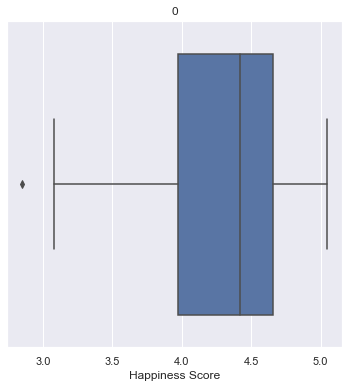

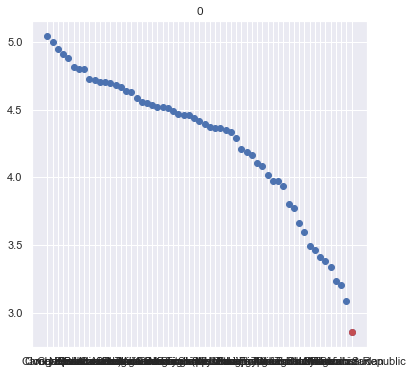

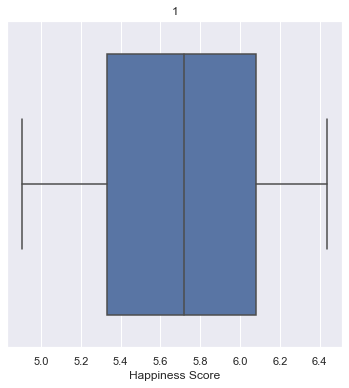

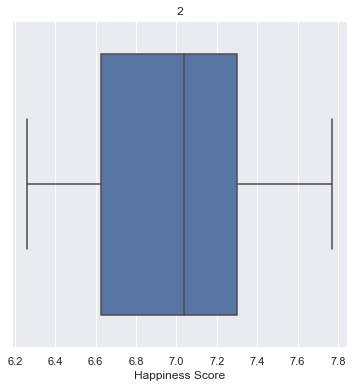

In [450]:
outliers=boxplot(clustered_2019,"Happiness Score")

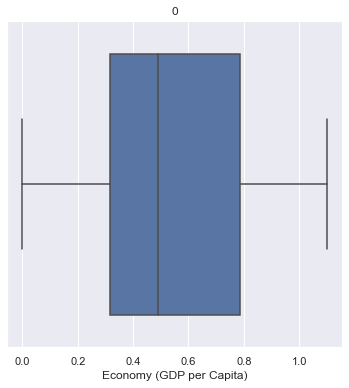

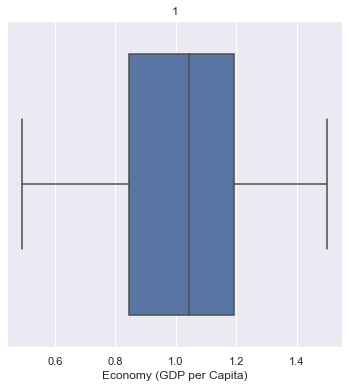

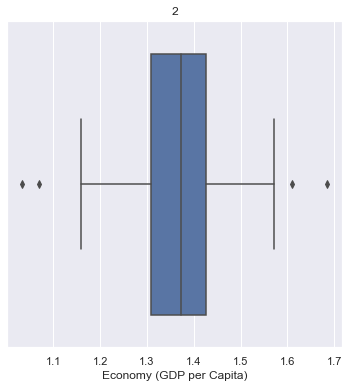

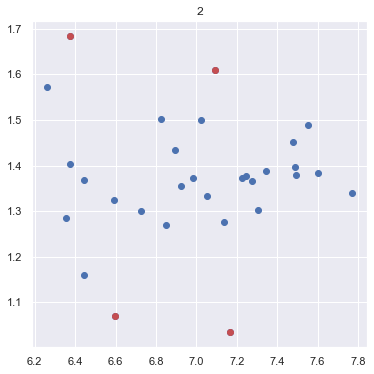

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,2
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316,2
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073,2
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,2


In [451]:
outliers=boxplot(clustered_2019,"Economy (GDP per Capita)")
outliers

The countries that are outliers are two extremes in terms of GDP. Therefor this behaviour is expected and will not be imputed.

In [452]:
#handling(clustered_2019,outliers,"Economy (GDP per Capita)")

Done
Done
[0]
[1.684]
[27]
[1.572]
[0]
[1.684]
[26]
1.499
Done


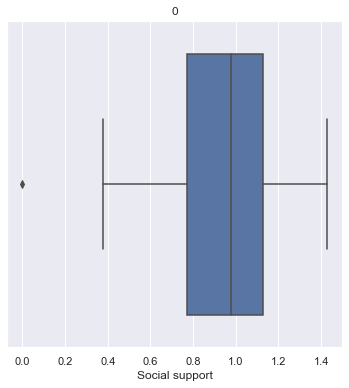

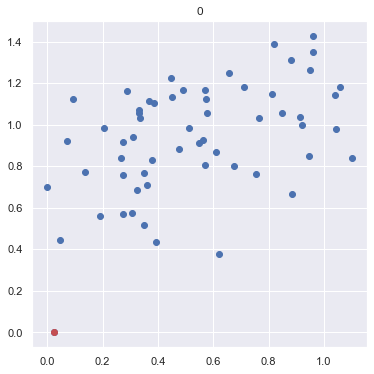

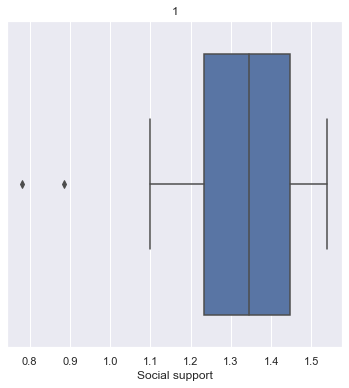

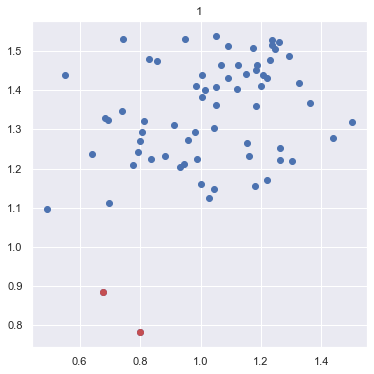

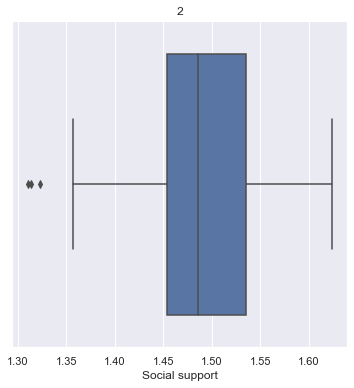

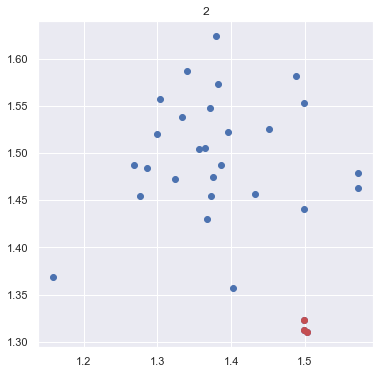

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0
66,67,Pakistan,5.653,0.677,0.886,0.535,0.313,0.220,0.098,1
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076,1
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,2
22,23,Mexico,6.595,1.499,1.323,0.861,0.433,0.074,0.073,2
28,29,Qatar,6.374,1.499,1.313,0.871,0.555,0.220,0.167,2


In [453]:
outliers=boxplot(clustered_2019,"Social support")
outliers

For the same reasons as above, we will not be handling those outliers because it can be concluded that the values are valid and not noise or human errors.

In [454]:
#handling(clustered_2019,outliers,"Social support")


[0]
[1.427]
Done
[1]
[0.782]
[0]
[1.538]
Done
[0]
[1.624]
[1]
[1.313]
[0]
[1.624]
Done


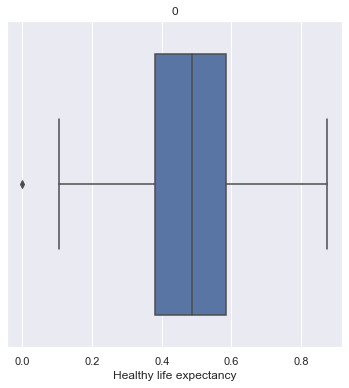

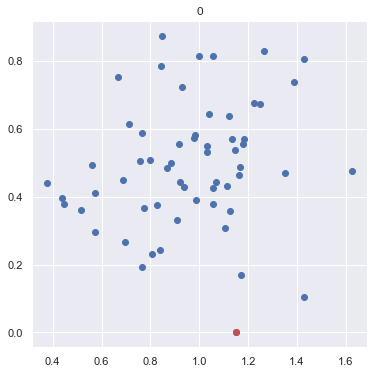

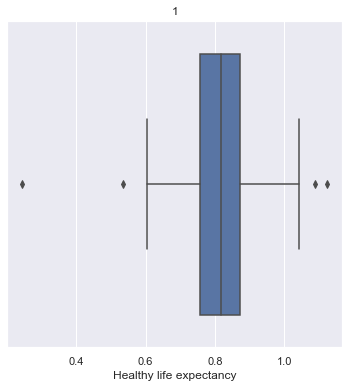

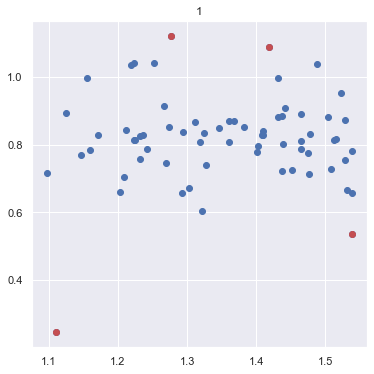

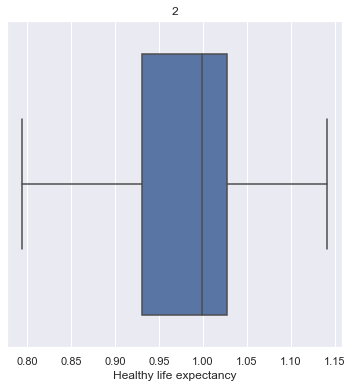

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,0
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140,1
66,67,Pakistan,5.653,0.677,1.538,0.535,0.313,0.220,0.098,1
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287,1
84,85,Nigeria,5.265,0.696,1.111,0.245,0.426,0.215,0.041,1


In [455]:
outliers=boxplot(clustered_2019,"Healthy life expectancy")
outliers

Japan persists to be an extreme in terms of life expectancy contribution to happiness. This behaviour is expected.

In [456]:
#handling(clustered_2019,outliers,"Healthy life expectancy")

[0]
[0.874]
Done
[65]
[1.042]
[1]
[0.245]
[64]
1.0390000000000001
[0]
[1.042]
Done
Done


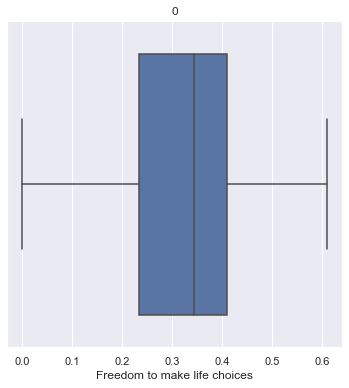

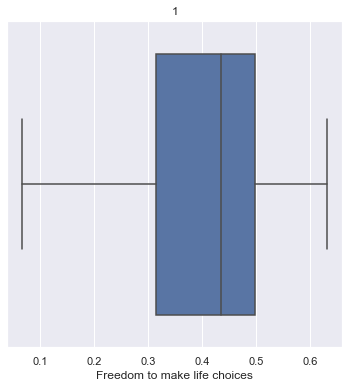

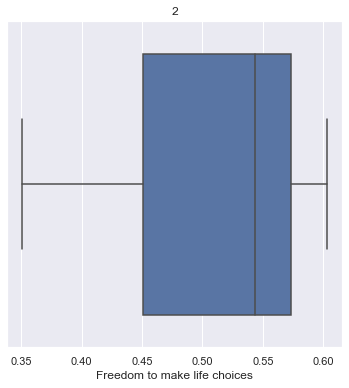

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster


In [457]:
outliers=boxplot(clustered_2019,"Freedom to make life choices")
outliers

In [458]:
#handling(clustered_2019,outliers,"Freedom to make life choices")

Done
Done
Done


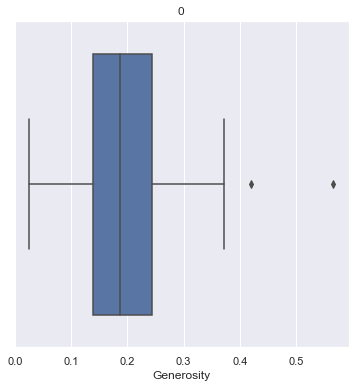

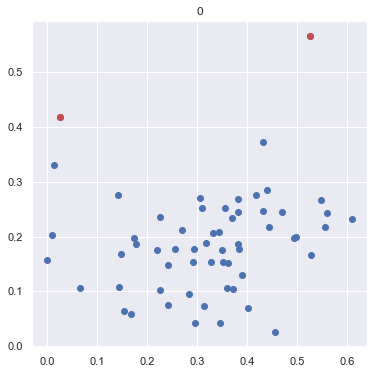

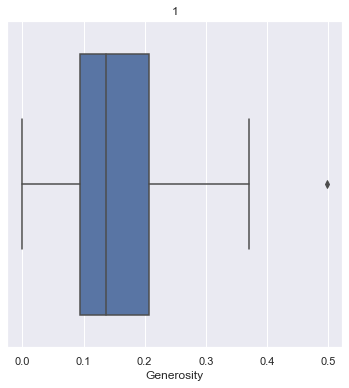

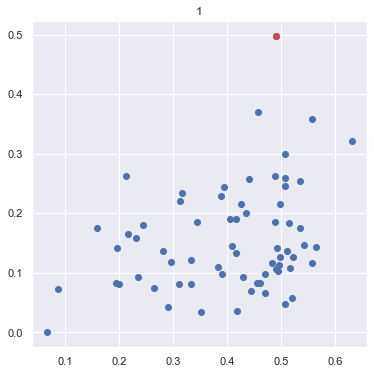

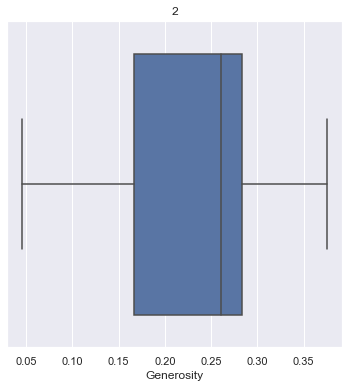

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172,0
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,0
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028,1


In [459]:
outliers=boxplot(clustered_2019,"Generosity")
outliers

The factor of generosity is very culture specific and therefore anomalies are normal and wont be smoothed.

In [460]:
#handling(clustered_2019,outliers,"Generosity")

[58]
0.331
[57]
0.285
Done
[66]
0.322
Done
Done


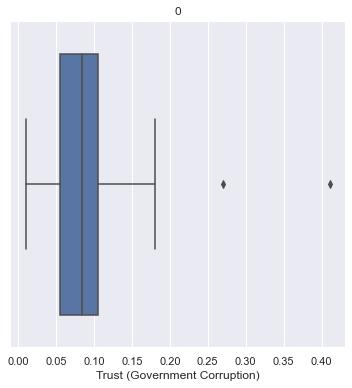

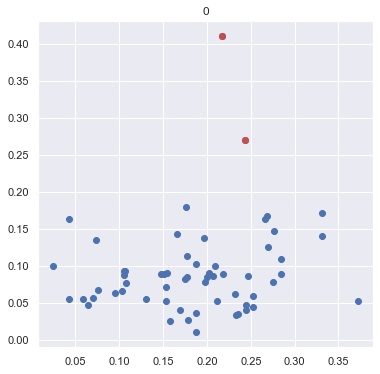

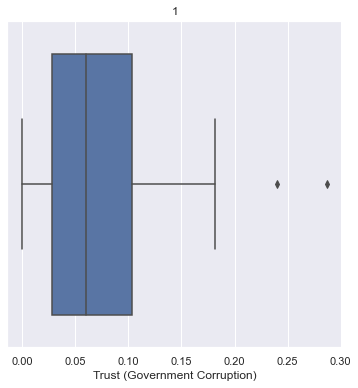

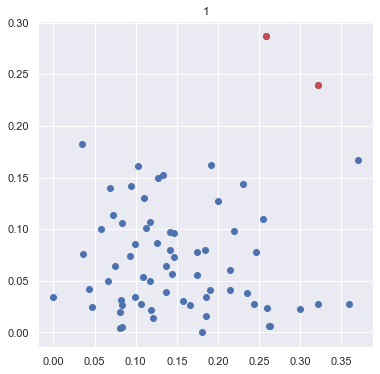

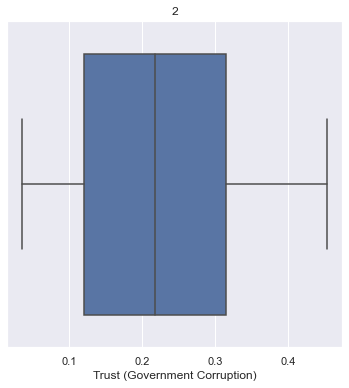

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Government Corruption),Cluster
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270,0
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
40,41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240,1
75,76,Hong Kong,5.430,1.438,1.277,1.039,0.440,0.258,0.287,1


In [461]:
outliers=boxplot(clustered_2019,"Trust (Government Corruption)")
outliers

Hong Kong persists to be in this list. The outlier behavious is very culture specific and therfore we will not tamper with the values.

In [462]:
#handling(clustered_2019,outliers,"Trust (Government Corruption)")

[57]
[0.18]
[57]
0.16699999999999998
Done
[65]
[0.182]
[65]
0.162
Done
Done


## Exporting the data

In [463]:
root_path='Cleaned_data/happiness_data_sets/'
clustered_2015.to_csv(root_path+'2015.csv')
clustered_2016.to_csv(root_path+'2016.csv')
clustered_2017.to_csv(root_path+'2017.csv')
clustered_2018.to_csv(root_path+'2018.csv')
clustered_2019.to_csv(root_path+'2019.csv')